In [2]:
#
import plotly.offline as pyo # 그래프를 그리기 위함 // 
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

In [228]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=e3fc5b3e93863fc68b77d901e39809228a23a0ab21ae6ec2f25bd4ed557f53fb
  Stored in directory: /Users/wani/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [3]:
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')
import chart_studio.plotly as py

In [1]:

import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os

In [4]:
# /Users/wani/Desktop/DataVisual
#file_path1 = './data/chipotle.csv'
file_path = './datasets/'


json_path = './skorea-provinces-geo.json'

In [5]:
law = pd.read_csv(file_path + '전주시_불법주정차_단속현황.csv', encoding='cp949')
law

구청구분        단속일자   단속시간          단속장소명       단속구분     데이터기준일자
0        덕진구  2017-01-01  07:27     덕진광장 공영주차장    고정식CCTV  2022-08-30
1        덕진구  2017-01-01  07:29      인후동건지산이지움    고정식CCTV  2022-08-30
2        덕진구  2017-01-01  07:30   실내체육관(정상어학원)    고정식CCTV  2022-08-30
3        덕진구  2017-01-01  07:34   전북대구정문(시사영어)    고정식CCTV  2022-08-30
4        덕진구  2017-01-01  08:57      인후동건지산이지움    고정식CCTV  2022-08-30
...      ...         ...    ...            ...        ...         ...
1037060  완산구  2022-06-30  21:14     CGV고사점CCTV  고정형CCTV단속  2022-08-30
1037061  완산구  2022-06-30  21:16     CGV고사점CCTV  고정형CCTV단속  2022-08-30
1037062  완산구  2022-06-30  21:23  한옥마을중앙초교앞CCTV  고정형CCTV단속  2022-08-30
1037063  완산구  2022-06-30  21:24   코오롱스카이정문CCTV  고정형CCTV단속  2022-08-30
1037064  완산구  2022-06-30  21:25   풍남문로터리농협CCTV  고정형CCTV단속  2022-08-30

[1037065 rows x 6 columns]

In [465]:
l = law[(law['단속장소명'] == '전북대구정문앞')]
l

구청구분        단속일자   단속시간    단속장소명     단속구분
58861   덕진구  2017-09-05  09:55  전북대구정문앞     인력단속
58864   덕진구  2017-09-05  09:57  전북대구정문앞     인력단속
58865   덕진구  2017-09-05  09:58  전북대구정문앞     인력단속
101449  덕진구  2018-03-05  18:10  전북대구정문앞  고정식CCTV
101455  덕진구  2018-03-05  18:26  전북대구정문앞  고정식CCTV
...     ...         ...    ...      ...      ...
479025  덕진구  2022-06-29  17:18  전북대구정문앞  고정식CCTV
479028  덕진구  2022-06-29  17:26  전북대구정문앞  고정식CCTV
479061  덕진구  2022-06-29  18:32  전북대구정문앞  고정식CCTV
479062  덕진구  2022-06-29  18:33  전북대구정문앞  고정식CCTV
479192  덕진구  2022-06-30  10:50  전북대구정문앞  고정식CCTV

[18573 rows x 5 columns]

In [6]:
law = law[['구청구분', '단속일자', '단속시간', '단속장소명', '단속구분']]

In [467]:
law_D = law[(law['구청구분'] == '덕진구')]

Empty DataFrame
Columns: [구청구분, 단속일자, 단속시간, 단속장소명, 단속구분, 월별, 요일]
Index: []

In [468]:
law_W = law[(law['구청구분'] == '완산구')]


In [9]:
law_W


구청구분        단속일자   단속시간          단속장소명       단속구분
479434   완산구  2017-07-01  07:01        스타벅스커피앞  고정형CCTV단속
479435   완산구  2017-07-01  07:04           골든시티  고정형CCTV단속
479436   완산구  2017-07-01  07:04        스타벅스커피앞  고정형CCTV단속
479437   완산구  2017-07-01  07:05     SK리더스뷰 사거리  고정형CCTV단속
479438   완산구  2017-07-01  07:06     중화산동공영주차장앞  고정형CCTV단속
...      ...         ...    ...            ...        ...
1037060  완산구  2022-06-30  21:14     CGV고사점CCTV  고정형CCTV단속
1037061  완산구  2022-06-30  21:16     CGV고사점CCTV  고정형CCTV단속
1037062  완산구  2022-06-30  21:23  한옥마을중앙초교앞CCTV  고정형CCTV단속
1037063  완산구  2022-06-30  21:24   코오롱스카이정문CCTV  고정형CCTV단속
1037064  완산구  2022-06-30  21:25   풍남문로터리농협CCTV  고정형CCTV단속

[557590 rows x 5 columns]

In [99]:
law_D.groupby('단속장소명').count()[law_D.columns[1]]


단속장소명
(구) 법원 민원실                     4
(주민신고제)                        1
21세기 축산물부근 횡단보도(자전거순찰대)        1
CU혁신해피트리점 앞 횡단보도(자전거순찰대)       1
D_Name 기지로                    56
                            ... 
휴먼빌공사장주변-시민불편신고                1
휴엔하임                        8076
휴엔하임 횡단보도                      2
흥국생명                         428
희망철거인력인근 횡단보도(자전거순찰대)          1
Name: 단속일자, Length: 16727, dtype: int64

In [469]:
law_W.groupby('단속장소명').count()[law_W.columns[1]]


단속장소명
(주)제일전기 부근 교육문화센터 앞 횡단보도       1
440-1 GS칼텍스앞 인도                1
483-15중노송동                     1
87-7 교동 소방시설                   1
Aura  커피숍 옆 녹도                 1
                            ... 
힐스테이트 APT 정문                2181
힐스테이트 APT 후문                1705
힐스테이트 아파트 정문                2150
힐스테이트 아파트 후문                1175
힐스테이트와 신원사이 인도                 1
Name: 단속일자, Length: 18163, dtype: int64

In [ ]:
#df[df['name'].str.contains('li')]


In [100]:
# 월별로 얼마나 단속되엇는지 확인, 년월별로 구분하기
# 1. 년별 /
law_W_17 = law_W[law_W['단속일자'].str.contains('2017')]
law_W_18 = law_W[law_W['단속일자'].str.contains('2018')]
law_W_19 = law_W[law_W['단속일자'].str.contains('2019')]
law_W_20 = law_W[law_W['단속일자'].str.contains('2020')]
law_W_21 = law_W[law_W['단속일자'].str.contains('2021')]
law_W_22 = law_W[law_W['단속일자'].str.contains('2022')]

In [119]:
law_W_17

구청구분        단속일자   단속시간       단속장소명       단속구분  월별        요일
479434  완산구  2017-07-01  07:01     스타벅스커피앞  고정형CCTV단속   7  Saturday
479435  완산구  2017-07-01  07:04        골든시티  고정형CCTV단속   7  Saturday
479436  완산구  2017-07-01  07:04     스타벅스커피앞  고정형CCTV단속   7  Saturday
479437  완산구  2017-07-01  07:05  SK리더스뷰 사거리  고정형CCTV단속   7  Saturday
479438  완산구  2017-07-01  07:06  중화산동공영주차장앞  고정형CCTV단속   7  Saturday
...     ...         ...    ...         ...        ...  ..       ...
519603  완산구  2017-12-31  21:29  전동풍남로터리편의점  고정형CCTV단속  12    Sunday
519604  완산구  2017-12-31  21:31  전동풍남로터리편의점  고정형CCTV단속  12    Sunday
519605  완산구  2017-12-31  21:34   전동풍남로터리농협  고정형CCTV단속  12    Sunday
519606  완산구  2017-12-31  21:37   전동풍남로터리농협  고정형CCTV단속  12    Sunday
519607  완산구  2017-12-31  21:45   전동풍남로터리농협  고정형CCTV단속  12    Sunday

[40174 rows x 7 columns]

In [12]:
# 1. 년별 /

law_D_17 = law_D[law_D['단속일자'].str.contains('2017')]
law_D_18 = law_D[law_D['단속일자'].str.contains('2018')]
law_D_19 = law_D[law_D['단속일자'].str.contains('2019')]
law_D_20 = law_D[law_D['단속일자'].str.contains('2020')]
law_D_21 = law_D[law_D['단속일자'].str.contains('2021')]
law_D_22 = law_D[law_D['단속일자'].str.contains('2022')]

In [13]:
#
law_D_17

구청구분        단속일자   단속시간         단속장소명     단속구분
0      덕진구  2017-01-01  07:27    덕진광장 공영주차장  고정식CCTV
1      덕진구  2017-01-01  07:29     인후동건지산이지움  고정식CCTV
2      덕진구  2017-01-01  07:30  실내체육관(정상어학원)  고정식CCTV
3      덕진구  2017-01-01  07:34  전북대구정문(시사영어)  고정식CCTV
4      덕진구  2017-01-01  08:57     인후동건지산이지움  고정식CCTV
...    ...         ...    ...           ...      ...
85729  덕진구  2017-12-31  19:56     반월동주공아파트앞  고정식CCTV
85730  덕진구  2017-12-31  19:59       농협 아중지점  고정식CCTV
85731  덕진구  2017-12-31  20:07       시외버스터미널  고정식CCTV
85732  덕진구  2017-12-31  20:19          휴엔하임  고정식CCTV
85733  덕진구  2017-12-31  21:47          휴엔하임  고정식CCTV

[85734 rows x 5 columns]

In [14]:
law_D['월별'] = pd.to_datetime(law_D['단속일자']).dt.month
law_D['요일'] = pd.to_datetime(law_D['단속일자']).dt.day_name()
law_D

구청구분        단속일자   단속시간                         단속장소명     단속구분  월별  \
0       덕진구  2017-01-01  07:27                    덕진광장 공영주차장  고정식CCTV   1   
1       덕진구  2017-01-01  07:29                     인후동건지산이지움  고정식CCTV   1   
2       덕진구  2017-01-01  07:30                  실내체육관(정상어학원)  고정식CCTV   1   
3       덕진구  2017-01-01  07:34                  전북대구정문(시사영어)  고정식CCTV   1   
4       덕진구  2017-01-01  08:57                     인후동건지산이지움  고정식CCTV   1   
...     ...         ...    ...                           ...      ...  ..   
479429  덕진구  2022-06-30  21:00                       고속버스터미널  고정식CCTV   6   
479430  덕진구  2022-06-30  21:06                          휴엔하임  고정식CCTV   6   
479431  덕진구  2022-06-30  21:28                   여의동 한국수자원공사  고정식CCTV   6   
479432  덕진구  2022-06-30  21:43    덕진구 덕진동2가 693-5 인도 (주민신고제)  112민원신고   6   
479433  덕진구  2022-06-30  22:25  덕진구 송천동1가 12-12 횡단보도 (주민신고제)  112민원신고   6   

              요일  
0         Sunday  
1         Sunday  
2         Sunday  
3         Sunday  
4         Sunday  
...          ...  
479429  Thursday  
479430  Thursday  
479431  Thursday  
479432  Thursday  
479433  Thursday  

[478867 rows x 7 columns]

In [16]:
law_d_day = pd.pivot_table(data = law_D, index = '요일', values = '단속장소명', aggfunc = 'count')

In [17]:
# D 덕진구
law_d_day.reset_index(inplace=True)
law_d_day

요일  단속장소명
0     Friday  77337
1     Monday  77175
2   Saturday  52388
3     Sunday  49965
4   Thursday  75069
5    Tuesday  75077
6  Wednesday  71856

In [18]:
law_d_day.rename(columns = {'단속장소명':'불법주정차수'}, inplace = True)

In [23]:
law_d_day = law_d_day.sort_values(by = '요일', ascending=False)
law_d_day

요일  불법주정차수
6  Wednesday   71856
5    Tuesday   75077
4   Thursday   75069
3     Sunday   49965
2   Saturday   52388
1     Monday   77175
0     Friday   77337

In [61]:
law_d_dayfig = px.bar(law_d_day, x ="요일", y ="불법주정차수", color = '요일', title = '전주시 덕진구 요일별 불법 주정차 단속수')

law_d_dayfig.show()
law_d_dayfig.write_html("law_d_dayfig.html")

In [26]:
law_W['월별'] = pd.to_datetime(law_W['단속일자']).dt.month
law_W['요일'] = pd.to_datetime(law_W['단속일자']).dt.day_name()
law_W

구청구분        단속일자   단속시간          단속장소명       단속구분  월별        요일
479434   완산구  2017-07-01  07:01        스타벅스커피앞  고정형CCTV단속   7  Saturday
479435   완산구  2017-07-01  07:04           골든시티  고정형CCTV단속   7  Saturday
479436   완산구  2017-07-01  07:04        스타벅스커피앞  고정형CCTV단속   7  Saturday
479437   완산구  2017-07-01  07:05     SK리더스뷰 사거리  고정형CCTV단속   7  Saturday
479438   완산구  2017-07-01  07:06     중화산동공영주차장앞  고정형CCTV단속   7  Saturday
...      ...         ...    ...            ...        ...  ..       ...
1037060  완산구  2022-06-30  21:14     CGV고사점CCTV  고정형CCTV단속   6  Thursday
1037061  완산구  2022-06-30  21:16     CGV고사점CCTV  고정형CCTV단속   6  Thursday
1037062  완산구  2022-06-30  21:23  한옥마을중앙초교앞CCTV  고정형CCTV단속   6  Thursday
1037063  완산구  2022-06-30  21:24   코오롱스카이정문CCTV  고정형CCTV단속   6  Thursday
1037064  완산구  2022-06-30  21:25   풍남문로터리농협CCTV  고정형CCTV단속   6  Thursday

[557590 rows x 7 columns]

In [27]:
law_w_day = pd.pivot_table(data = law_W, index = '요일', values = '단속장소명', aggfunc = 'count')

In [28]:
law_w_day.rename(columns = {'단속장소명':'불법주정차수'}, inplace = True)

In [29]:
law_w_day.reset_index(inplace=True)
law_w_day

요일  불법주정차수
0     Friday   85857
1     Monday   81191
2   Saturday   76025
3     Sunday   73091
4   Thursday   83602
5    Tuesday   79381
6  Wednesday   78443

In [224]:
law_w_day.columns

Index(['요일', '불법주정차수'], dtype='object')

In [30]:
law_w_day = law_w_day.sort_values(by = '요일', ascending=False)
law_w_day

요일  불법주정차수
6  Wednesday   78443
5    Tuesday   79381
4   Thursday   83602
3     Sunday   73091
2   Saturday   76025
1     Monday   81191
0     Friday   85857

In [31]:
law_w_dayfig = px.bar(law_w_day, x ="요일", y ="불법주정차수", color = '요일', title = '전주시 완산구 요일별 불법 주정차 단속수')

law_w_dayfig.show()
law_w_dayfig.write_html("law_w_dayfig.html")


In [32]:
# 24시간
law_D_7t =law_D.query('"07:00"<= 단속시간 <= "07:59"')
law_D_8t =law_D.query('"08:00"<= 단속시간 <= "08:59"')
law_D_9t =law_D.query('"09:00"<= 단속시간 <= "09:59"')
law_D_10t =law_D.query('"10:00"<= 단속시간 <= "10:59"')
law_D_11t =law_D.query('"11:00"<= 단속시간 <= "11:59"')
law_D_12t =law_D.query('"12:00"<= 단속시간 <= "12:59"')
law_D_13t =law_D.query('"13:00"<= 단속시간 <= "13:59"')
law_D_14t =law_D.query('"14:00"<= 단속시간 <= "14:59"')
law_D_15t =law_D.query('"15:00"<= 단속시간 <= "15:59"')
law_D_16t =law_D.query('"16:00"<= 단속시간 <= "16:59"')
law_D_17t =law_D.query('"17:00"<= 단속시간 <= "17:59"')
law_D_18t =law_D.query('"18:00"<= 단속시간 <= "18:59"')
law_D_19t =law_D.query('"19:00"<= 단속시간 <= "19:59"')
law_D_20t =law_D.query('"20:00"<= 단속시간 <= "20:59"')
law_D_21t =law_D.query('"21:00"<= 단속시간 <= "21:59"')
law_D_22t =law_D.query('"22:00"<= 단속시간 <= "22:59"')
law_D_23t =law_D.query('"23:00"<= 단속시간 <= "23:59"')
law_D_24t =law_D.query('"00:00"<= 단속시간 <= "00:59"')

law_D_01t =law_D.query('"01:00"<= 단속시간 <= "01:59"')
law_D_02t =law_D.query('"02:00"<= 단속시간 <= "02:59"')
law_D_03t =law_D.query('"03:00"<= 단속시간 <= "03:59"')
law_D_04t =law_D.query('"04:00"<= 단속시간 <= "04:59"')
law_D_05t =law_D.query('"05:00"<= 단속시간 <= "05:59"')
law_D_06t =law_D.query('"06:00"<= 단속시간 <= "06:59"')


In [77]:
law_DT = [len(law_D_24t), len(law_D_01t), len(law_D_02t), len(law_D_03t), len(law_D_04t),
          len(law_D_05t), len(law_D_06t), len(law_D_7t), len(law_D_8t), len(law_D_9t), 
          len(law_D_10t), len(law_D_11t), len(law_D_12t), len(law_D_13t), len(law_D_14t),
         len(law_D_15t), len(law_D_16t), len(law_D_17t), len(law_D_18t), len(law_D_19t),
         len(law_D_20t), len(law_D_21t), len(law_D_22t), len(law_D_23t)] # 완산구
law_Dtime = pd.DataFrame({'시간대':time, '불법주정차수':law_DT})
law_Dtime

시간대  불법주정차수
0   00시     514
1   01시     311
2   02시     170
3   03시     102
4   04시     110
5   05시     272
6   06시     467
7   07시   22254
8   08시   14937
9   09시   24061
10  10시   77379
11  11시   11782
12  12시    8644
13  13시    7623
14  14시   91280
15  15시   51536
16  16시   54206
17  17시   35162
18  18시   38737
19  19시   23193
20  20시    7887
21  21시    6179
22  22시    1283
23  23시     778

In [58]:
law_D_06t


구청구분        단속일자   단속시간                          단속장소명     단속구분  월별  \
99128   덕진구  2018-02-24  06:23         덕진구 팔복동2가803-1(생활불편신고)  112민원신고   2   
155728  덕진구  2018-10-16  06:49                  횡단보도주차-시민불편신고  112민원신고  10   
158124  덕진구  2018-10-25  06:38                     주정차-시민불편신고  112민원신고  10   
158125  덕진구  2018-10-25  06:38                     주정차-시민불편신고  112민원신고  10   
196494  덕진구  2019-04-19  06:21             덕진구 진북1169(시민불편신고)  112민원신고   4   
...     ...         ...    ...                            ...      ...  ..   
477718  덕진구  2022-06-26  06:01     덕진구 송천동2가 1419 횡단보도(주민신고제)  112민원신고   6   
478403  덕진구  2022-06-28  06:17      덕진구 인후동1가 962 횡단보도(주민신고제)  112민원신고   6   
478404  덕진구  2022-06-28  06:19       덕진구 인후동1가 962 모퉁이(주민신고제)  112민원신고   6   
478775  덕진구  2022-06-29  06:29   덕진구 송천동1가 626-74 횡단보도(주민신고제)  112민원신고   6   
479110  덕진구  2022-06-30  06:58  덕진구 우아동2가 808-11 일반-계도(주민신고제)  112민원신고   6   

               요일  
99128    Saturday  
155728    Tuesday  
158124   Thursday  
158125   Thursday  
196494     Friday  
...           ...  
477718     Sunday  
478403    Tuesday  
478404    Tuesday  
478775  Wednesday  
479110   Thursday  

[467 rows x 7 columns]

In [470]:
law_W.groupby('단속장소명').count()[law_W.columns[1]]

단속장소명
(주)제일전기 부근 교육문화센터 앞 횡단보도       1
440-1 GS칼텍스앞 인도                1
483-15중노송동                     1
87-7 교동 소방시설                   1
Aura  커피숍 옆 녹도                 1
                            ... 
힐스테이트 APT 정문                2181
힐스테이트 APT 후문                1705
힐스테이트 아파트 정문                2150
힐스테이트 아파트 후문                1175
힐스테이트와 신원사이 인도                 1
Name: 단속일자, Length: 18163, dtype: int64

In [ ]:
# 단속장소가 보통 어디에 중점이 되었나? 
# 인구? 아니면 상가 및 아파트 중심 지역 -> 과연 사람이 많이 활동하는 곳이 어디일까?
# 상가찾기에는 힘들다 / 인구로 -> 밀집 동별 
# 도로폭에 따라 신고 건수와 유기적 관련이 있는가 -> 골목길이 많은 공간 찾기 -> 공간데이터

In [148]:
# 같은 시간 같은 장소에서 가장 많이 이루어지는 단속!수 어느정도일까?
# 그리고 시간대별로 데이터프레임 만들어, 장소별 scatter /
# 시간대별 장소별 scatter -> 같은 시간대별로 단속장소 일치


구청구분        단속일자   단속시간                         단속장소명     단속구분
62234   덕진구  2017-09-20  00:47                     사대부고(허병원)  고정식CCTV
62235   덕진구  2017-09-20  00:49                     사대부고(허병원)  고정식CCTV
196019  덕진구  2019-04-17  00:48        덕진구 우아3가700-35(시민불편신고)  112민원신고
196250  덕진구  2019-04-18  00:14           덕진구 우아3가717(시민불편신고)  112민원신고
198220  덕진구  2019-04-26  00:57         덕진구 우아3가434-2(시민불편신고)  112민원신고
...     ...         ...    ...                           ...      ...
476264  덕진구  2022-06-21  00:17  덕진구 덕진동1가 1312-79 모퉁이(주민신고제)  112민원신고
476265  덕진구  2022-06-21  00:41    덕진구 우아동1가 1128 횡단보도(주민신고제)  112민원신고
476266  덕진구  2022-06-21  00:43    덕진구 우아동1가 1129 횡단보도(주민신고제)  112민원신고
476267  덕진구  2022-06-21  00:45    덕진구 우아동1가 1137 횡단보도(주민신고제)  112민원신고
478030  덕진구  2022-06-27  00:16     덕진구 송천동1가 315 횡단보도(주민신고제)  112민원신고

[514 rows x 5 columns]

In [ ]:
lawDT = [ ] # 가장 단속 수 많은 


In [ ]:
fig = px.bar(law_D, x="", y="", color="단속장소명",
  animation_frame="단속시간", animation_group="단속장소명")
fig.show()


In [33]:
law_D_7t.groupby('단속장소명').count()[law_D_7t.columns[1]]

단속장소명
KT북전주 777타이어          23
e편한세상아파트 정문            5
가리내로 부근                9
가리내로 부근(곡각지)           2
건산로 부근                 4
                    ... 
호성로 부근(승강장)            1
호성로 부근(횡단보도)           4
횡단보도-불법주정차-시민불편신고      1
휴엔하임                 278
흥국생명                  37
Name: 단속일자, Length: 817, dtype: int64

In [59]:
law_D_06t.groupby('단속장소명').count()[law_D_06t.columns[1]]


단속장소명
덕진 반월동 238-14 횡단보도(주민신고제)      1
덕진 호성동1가 738-53 횡단보도(주민신고제)    1
덕진구 가재미로 73 횡단보도(주민신고제)        1
덕진구 고랑동 808-14(시민불편신고)         1
덕진구 금암동 1589(시민불편신고)           1
                              ..
덕진구 호성동1가 897-20(시민불편신고)       1
덕진구 호성동2가 634-1(시민불편신고)        1
덕진구 호성동2가 662-19 계도(시민불편신고)    1
주정차-시민불편신고                     2
횡단보도주차-시민불편신고                  1
Name: 단속일자, Length: 247, dtype: int64

In [276]:
law_D_8t.groupby('단속장소명').count()[law_D_8t.columns[1]]


단속장소명
KT북전주 777타이어                  26
e편한세상아파트 정문                    1
가리내로 부근                       42
가리내로 부근(곡각지)                   2
건산로 부근                        16
                            ... 
횡단보도-불법주정차-시민불편신고              1
횡단보도-어린이사고위험-불법주정차-시민불편신고      1
횡단보도에주차-시민불편신고                 1
휴엔하임                         221
흥국생명                          47
Name: 단속일자, Length: 1245, dtype: int64

In [471]:
la = pd.DataFrame(law_D_8t.groupby('단속장소명').count()[law_D_8t.columns[1]])
la.reset_index()

단속장소명  단속일자
0                  KT북전주 777타이어    26
1                   e편한세상아파트 정문     1
2                       가리내로 부근    42
3                  가리내로 부근(곡각지)     2
4                        건산로 부근    16
...                         ...   ...
1240          횡단보도-불법주정차-시민불편신고     1
1241  횡단보도-어린이사고위험-불법주정차-시민불편신고     1
1242             횡단보도에주차-시민불편신고     1
1243                       휴엔하임   221
1244                       흥국생명    47

[1245 rows x 2 columns]

In [ ]:
#road = road[road[' 법정동코드 '] >= 4511000100]

In [472]:
lawD24t = pd.DataFrame(law_D_24t.groupby('단속장소명').count()[law_D_24t.columns[1]])
lawD24t = lawD24t.reset_index()
lawD01t = pd.DataFrame(law_D_01t.groupby('단속장소명').count()[law_D_01t.columns[1]])
lawD01t =lawD01t.reset_index()
lawD02t = pd.DataFrame(law_D_02t.groupby('단속장소명').count()[law_D_02t.columns[1]])
lawD02t = lawD02t.reset_index()
lawD03t = pd.DataFrame(law_D_03t.groupby('단속장소명').count()[law_D_03t.columns[1]])
lawD03t = lawD03t.reset_index()
lawD04t = pd.DataFrame(law_D_04t.groupby('단속장소명').count()[law_D_04t.columns[1]])
lawD04t = lawD04t.reset_index()
lawD05t = pd.DataFrame(law_D_05t.groupby('단속장소명').count()[law_D_05t.columns[1]])
lawD05t =lawD05t.reset_index()
lawD06t = pd.DataFrame(law_D_06t.groupby('단속장소명').count()[law_D_06t.columns[1]])
lawD06t = lawD06t.reset_index()

lawD7t = pd.DataFrame(law_D_7t.groupby('단속장소명').count()[law_D_7t.columns[1]])
lawD7t = lawD7t.reset_index()
lawD8t = pd.DataFrame(law_D_8t.groupby('단속장소명').count()[law_D_8t.columns[1]])
lawD8t= lawD8t.reset_index()
lawD9t = pd.DataFrame(law_D_9t.groupby('단속장소명').count()[law_D_9t.columns[1]])
lawD09t =lawD9t.reset_index()
lawD10t = pd.DataFrame(law_D_10t.groupby('단속장소명').count()[law_D_10t.columns[1]])
lawD10t = lawD10t.reset_index()
lawD11t = pd.DataFrame(law_D_11t.groupby('단속장소명').count()[law_D_11t.columns[1]])
lawD11t = lawD11t.reset_index()
lawD12t = pd.DataFrame(law_D_12t.groupby('단속장소명').count()[law_D_12t.columns[1]])
lawD12t = lawD12t.reset_index()
lawD13t = pd.DataFrame(law_D_13t.groupby('단속장소명').count()[law_D_13t.columns[1]])
lawD13t = lawD13t.reset_index()
lawD14t = pd.DataFrame(law_D_14t.groupby('단속장소명').count()[law_D_14t.columns[1]])
lawD14t = lawD14t.reset_index()
lawD15t = pd.DataFrame(law_D_15t.groupby('단속장소명').count()[law_D_15t.columns[1]])
lawD15t = lawD15t.reset_index()
lawD16t = pd.DataFrame(law_D_16t.groupby('단속장소명').count()[law_D_16t.columns[1]])
lawD16t = lawD16t.reset_index()
lawD17t = pd.DataFrame(law_D_17t.groupby('단속장소명').count()[law_D_17t.columns[1]])
lawD17t = lawD17t.reset_index()
lawD18t = pd.DataFrame(law_D_18t.groupby('단속장소명').count()[law_D_18t.columns[1]])
lawD18t = lawD18t.reset_index()
lawD19t = pd.DataFrame(law_D_19t.groupby('단속장소명').count()[law_D_19t.columns[1]])
lawD19t = lawD19t.reset_index()
lawD20t = pd.DataFrame(law_D_20t.groupby('단속장소명').count()[law_D_20t.columns[1]])
lawD20t = lawD20t.reset_index()

lawD21t = pd.DataFrame(law_D_21t.groupby('단속장소명').count()[law_D_21t.columns[1]])
lawD21t = lawD21t.reset_index()
lawD22t = pd.DataFrame(law_D_22t.groupby('단속장소명').count()[law_D_22t.columns[1]])
lawD22t = lawD22t.reset_index()
lawD23t = pd.DataFrame(law_D_23t.groupby('단속장소명').count()[law_D_23t.columns[1]])
lawD23t = lawD23t.reset_index()


In [455]:
lawD24t = lawD24t.rename(columns = {'단속일자': '단속수'})
lawD01t = lawD01t.rename(columns = {'단속일자': '단속수'})
lawD02t = lawD02t.rename(columns = {'단속일자': '단속수'})
lawD03t = lawD03t.rename(columns = {'단속일자': '단속수'})
lawD04t = lawD04t.rename(columns = {'단속일자': '단속수'})
lawD05t = lawD05t.rename(columns = {'단속일자': '단속수'})
lawD06t = lawD06t.rename(columns = {'단속일자': '단속수'})
lawD8t = lawD8t.rename(columns = {'단속일자': '단속수'})
lawD7t = lawD7t.rename(columns = {'단속일자': '단속수'})
lawD9t = lawD9t.rename(columns = {'단속일자': '단속수'})
lawD10t = lawD10t.rename(columns = {'단속일자': '단속수'})
lawD11t = lawD11t.rename(columns = {'단속일자': '단속수'})
lawD12t = lawD12t.rename(columns = {'단속일자': '단속수'})
lawD13t = lawD13t.rename(columns = {'단속일자': '단속수'})
lawD14t = lawD14t.rename(columns = {'단속일자': '단속수'})
lawD15t = lawD15t.rename(columns = {'단속일자': '단속수'})
lawD16t = lawD16t.rename(columns = {'단속일자': '단속수'})
lawD17t = lawD17t.rename(columns = {'단속일자': '단속수'})
lawD18t = lawD18t.rename(columns = {'단속일자': '단속수'})

lawD21t = lawD23t.rename(columns = {'단속일자': '단속수'})
lawD22t = lawD22t.rename(columns = {'단속일자': '단속수'})
lawD23t = lawD23t.rename(columns = {'단속일자': '단속수'})


In [ ]:
# 평균보다 큰 장소 각 찾기 lawD23t
#road = road[road[' 법정동코드 '] >= 4511000100]

In [354]:
lawD23t = lawD23t[lawD23t['단속수'] >= 1.6588486140724947]
lawD23t

단속장소명  단속수
0                         고속버스터미널    2
6           덕진구 금암121-201(시민불편신고)    2
7            덕진구 금암122-13(시민불편신고)    3
15           덕진구 금암동 1564(시민불편신고)    3
16         덕진구 금암동 1564-1(시민불편신고)    3
..                            ...  ...
453  덕진구 팔복동1가 711-2 횡단보도(시민불편신고)    3
456       덕진구 호성동1가 718 버스(주민신고제)    2
460     덕진구 호성동1가 826 횡단보도(주민신고제)    4
461       덕진구 호성동1가 851-4(시민불편신고)    2
468                    주정차-시민불편신고    2

[126 rows x 2 columns]

In [473]:
lD01tmean = law_D_01t.groupby('단속장소명').count()[law_D_01t.columns[1]].mean()
lD02tmean = law_D_02t.groupby('단속장소명').count()[law_D_02t.columns[1]].mean()
lD03tmean = law_D_03t.groupby('단속장소명').count()[law_D_03t.columns[1]].mean()
lD04tmean = law_D_04t.groupby('단속장소명').count()[law_D_04t.columns[1]].mean()
lD05tmean = law_D_05t.groupby('단속장소명').count()[law_D_05t.columns[1]].mean()
lD06tmean = law_D_06t.groupby('단속장소명').count()[law_D_06t.columns[1]].mean()

lD8tmean = law_D_8t.groupby('단속장소명').count()[law_D_8t.columns[1]].mean() # 평균 단속 건수보다 많은 장소 찾기
lD7tmean = law_D_7t.groupby('단속장소명').count()[law_D_7t.columns[1]].mean()
lD9tmean = law_D_9t.groupby('단속장소명').count()[law_D_9t.columns[1]].mean()
lD10tmean = law_D_10t.groupby('단속장소명').count()[law_D_10t.columns[1]].mean()
lD11tmean = law_D_11t.groupby('단속장소명').count()[law_D_11t.columns[1]].mean()
lD12tmean = law_D_12t.groupby('단속장소명').count()[law_D_12t.columns[1]].mean()
lD13tmean = law_D_13t.groupby('단속장소명').count()[law_D_13t.columns[1]].mean()
lD14tmean = law_D_14t.groupby('단속장소명').count()[law_D_14t.columns[1]].mean()
lD15tmean = law_D_15t.groupby('단속장소명').count()[law_D_15t.columns[1]].mean()
lD16tmean = law_D_16t.groupby('단속장소명').count()[law_D_16t.columns[1]].mean()
lD17tmean = law_D_17t.groupby('단속장소명').count()[law_D_17t.columns[1]].mean()
lD18tmean = law_D_18t.groupby('단속장소명').count()[law_D_18t.columns[1]].mean()
lD19tmean = law_D_19t.groupby('단속장소명').count()[law_D_19t.columns[1]].mean()
lD20tmean = law_D_20t.groupby('단속장소명').count()[law_D_20t.columns[1]].mean()
lD21tmean = law_D_21t.groupby('단속장소명').count()[law_D_21t.columns[1]].mean()
lD22tmean = law_D_22t.groupby('단속장소명').count()[law_D_22t.columns[1]].mean()
lD23tmean = law_D_23t.groupby('단속장소명').count()[law_D_23t.columns[1]].mean()
lD24tmean = law_D_24t.groupby('단속장소명').count()[law_D_24t.columns[1]].mean()

In [474]:
lawDPoisionTimeMean = [lD24tmean, lD01tmean, lD02tmean, lD03tmean, lD04tmean, lD05tmean,
                      lD06tmean, lD7tmean, lD8tmean, lD9tmean, lD10tmean, lD11tmean,
                      lD12tmean, lD13tmean, lD14tmean, lD15tmean, lD16tmean, lD17tmean,
                      lD18tmean, lD19tmean, lD20tmean, lD21tmean, lD22tmean, lD23tmean]

In [475]:
time

['00시',
 '01시',
 '02시',
 '03시',
 '04시',
 '05시',
 '06시',
 '07시',
 '08시',
 '09시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시',
 '23시']

In [476]:
lawDPoisionTimeMean

[1.7190635451505016,
 2.0194805194805197,
 1.5044247787610618,
 1.36,
 1.8644067796610169,
 1.825503355704698,
 1.8906882591093117,
 27.238678090575274,
 11.997590361445782,
 12.94298009682625,
 27.065057712486883,
 7.136281041792853,
 5.9084073820915926,
 5.323324022346369,
 29.521345407503233,
 18.679231605654223,
 18.220504201680672,
 15.149504523912107,
 12.933889816360601,
 8.233226837060704,
 4.333516483516483,
 4.919585987261146,
 1.6662337662337663,
 1.6588486140724947]

In [477]:
# 각 시간대별로 단속수 평균을 내어 여기서 평균 or 편차 / 9.379657216195314 보다 큰 시간대 찾아서 그 시간대에서 가장  단속 수 많은 곳 찾기
np.mean(lawDPoisionTimeMean)

9.379657216195314

In [478]:
# 7, 8, 9,10 14, 15, 16, 17, 18 시간에 많음
moreDtime = ['7시', '8시', '9시', '10시' ,'14시', '15시', '16시', '17시', '18시']
moreDmean = [27.238678090575274, 11.997590361445782, 12.94298009682625, 
             27.065057712486883, 29.521345407503233, 18.679231605654223,
             18.220504201680672, 15.149504523912107, 12.933889816360601]

In [ ]:
'''lawWcountbar = px.bar(lawWcount, x ="연도", y ="불법주정차수", color = '연도', title = '전주시 완산구 연도별 불법 주정차 단속수')

lawWcountbar.show()
lawWcountbar.write_html("lawWcountbar.html")
'''

In [479]:
ld7t = go.Scatter(x=lD7t['단속수'], y=d7, mode='markers', name = '7시', marker = {'color':'#fcbc68'})
ld8t = go.Scatter(x=lD8t['단속수'], y=d8, mode='markers', name = '8시', marker={'color':'#FF7F50'})
ld9t = go.Scatter(x=lD9t['단속수'], y=d9, mode='markers', name = '9시', marker={'color':'#7de5ff'})
ld10t = go.Scatter(x=lD10t['단속수'], y=d10, mode='markers', name = '10시', marker={'color':'#00FF00'})

ld14t = go.Scatter(x=lD14t['단속수'], y=d14, mode='markers', name = '14시', marker={'color':'#00FA9A'})
ld15t = go.Scatter(x=lD15t['단속수'], y=d15, mode='markers', name = '15시', marker={'color':'#00008B'})
ld16t = go.Scatter(x=lD16t['단속수'], y=d16, mode='markers', name = '16시', marker={'color':'#EE82EE'})
ld17t = go.Scatter(x=lD17t['단속수'], y=d17, mode='markers', name = '17시', marker={'color':'#FF1493'})
ld18t = go.Scatter(x=lD18t['단속수'], y=d18, mode='markers', name = '18시', marker={'color':'#1E90FF'})
data = [ld7t, ld8t, ld9t, ld10t, ld14t, ld15t, ld16t, ld17t, ld18t]
layout = go.Layout(title='전주시 덕진구 최다 단속(평균) 시간대별')
DtimerMeanfig = go.Figure(data=data, layout=layout)
DtimerMeanfig.show()
DtimerMeanfig.write_html("DtimerMeanfig.html")

In [480]:
d7 = [] # 
for i in lD7t['단속수']:
     d7.append(i/27.238678090575274)

d8 = [] # 

for i in lD8t['단속수']:
     d8.append(i/11.997590361445782)

d9 = [] # 

for i in lD9t['단속수']:
     d9.append(i/12.94298009682625)

d10 = [] # 

for i in lD10t['단속수']:
     d10.append(i/27.065057712486883)

        
d14 = [] # 

for i in lD14t['단속수']:
     d14.append(i/29.521345407503233)
        
d15 = [] # 

for i in lD15t['단속수']:
     d15.append(i/18.679231605654223)


d16 = [] # 

for i in lD16t['단속수']:
     d16.append(i/18.220504201680672)
        
                
d17 = [] # 

for i in lD17t['단속수']:
     d17.append(i/15.149504523912107)

        
d18 = [] # 

for i in lD18t['단속수']:
     d18.append(i/12.933889816360601)

In [481]:
print(1255/27.238678090575274)

46.074188909858904


In [482]:
lD17tfig = px.scatter(lD17t, x=d17, y="단속수", 
                 color = "단속장소명", title = '전주시 덕진구 17시 단속장소명',
                 size = "단속수")
lD17tfig.show()
lD17tfig.write_html("lD17tfig.html")

In [414]:
lD18tfig = px.scatter(lD18t, x=d18, y="단속수", 
                 color = "단속장소명", title = '전주시 덕진구 18시 단속장소명',
                 size = "단속수")
lD18tfig.show()
lD18tfig.write_html("lD18tfig.html")

In [483]:
lD7tfig = px.scatter(lD7t, x=d7, y="단속수", 
                 color = "단속장소명", title = '전주시 덕진구 7시 단속장소명',
                 size = "단속수")
lD7tfig.show()
lD7tfig.write_html("lD7tfig.html")

In [408]:
lD8tfig = px.scatter(lD8t, x=d8, y="단속수", 
                 color = "단속장소명", title = '전주시 덕진구 8시 단속장소명',
                 size = "단속수")
lD8tfig.show()
lD8tfig.write_html("lD8tfig.html")

In [484]:
lD14tfig = px.scatter(lD14t, x=d14, y="단속수", 
                 color = "단속장소명", title = '전주시 덕진구 14시 단속장소명',
                 size = "단속수")
lD14tfig.show()
lD14tfig.write_html("lD14tfig.html")

In [360]:
lD7t = lawD7t[lawD7t['단속수'] >=27.238678090575274]
lD8t = lawD8t[lawD8t['단속수'] >=11.997590361445782]
lD9t = lawD9t[lawD9t['단속수'] >=12.94298009682625]
lD10t = lawD10t[lawD10t['단속수'] >=27.065057712486883]
lD14t = lawD14t[lawD14t['단속수'] >=29.521345407503233]
lD15t = lawD15t[lawD15t['단속수'] >=18.679231605654223]
lD16t = lawD16t[lawD16t['단속수'] >=18.220504201680672]
lD17t = lawD17t[lawD17t['단속수'] >=15.149504523912107]
lD18t = lawD18t[lawD18t['단속수'] >=12.933889816360601]

In [361]:
lD16t

단속장소명   단속수
1        KT북전주 777타이어    25
9             가리내로 부근    60
32             건산로 부근    36
75         고랑동노블레스더센텀    19
76            고속버스터미널  1310
...               ...   ...
2961  호성동1가 호성3길 횡단보도    25
2962        호성동1가 호성로   111
2968        호성동동아아파트앞    50
2973             휴엔하임   735
2974             흥국생명    43

[338 rows x 2 columns]

In [52]:
#
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

In [53]:
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]
        

In [54]:
address = law_W['단속장소명']
address

479434           스타벅스커피앞
479435              골든시티
479436           스타벅스커피앞
479437        SK리더스뷰 사거리
479438        중화산동공영주차장앞
               ...      
1037060       CGV고사점CCTV
1037061       CGV고사점CCTV
1037062    한옥마을중앙초교앞CCTV
1037063     코오롱스카이정문CCTV
1037064     풍남문로터리농협CCTV
Name: 단속장소명, Length: 557590, dtype: object

In [499]:
law_W_17t


구청구분        단속일자   단속시간           단속장소명       단속구분
479592   완산구  2017-07-01  17:09        대우대창인근도로  고정형CCTV단속
479593   완산구  2017-07-01  17:10        대우대창인근도로  고정형CCTV단속
479594   완산구  2017-07-01  17:11        대우대창인근도로  고정형CCTV단속
479595   완산구  2017-07-01  17:14        대우대창인근도로  고정형CCTV단속
479596   완산구  2017-07-01  17:21        대우대창인근도로  고정형CCTV단속
...      ...         ...    ...             ...        ...
1036944  완산구  2022-06-30  17:53       완산소방서CCTV  고정형CCTV단속
1036945  완산구  2022-06-30  17:53  중앙동 전주초.어린이보호구      인력단속3
1036946  완산구  2022-06-30  17:54    그랜드힐스턴후문CCTV  고정형CCTV단속
1036947  완산구  2022-06-30  17:57    효자LH공사북측CCTV  고정형CCTV단속
1036948  완산구  2022-06-30  17:58      서일초등학교CCTV  고정형CCTV단속

[35141 rows x 5 columns]

In [485]:
# 완진구
law_W_7t =law_W.query('"07:00"<= 단속시간 <= "07:59"')
law_W_8t =law_W.query('"08:00"<= 단속시간 <= "08:59"')
law_W_9t =law_W.query('"09:00"<= 단속시간 <= "09:59"')
law_W_10t =law_W.query('"10:00"<= 단속시간 <= "10:59"')
law_W_11t =law_W.query('"11:00"<= 단속시간 <= "11:59"')
law_W_12t =law_W.query('"12:00"<= 단속시간 <= "12:59"')
law_W_13t =law_W.query('"13:00"<= 단속시간 <= "13:59"')
law_W_14t =law_W.query('"14:00"<= 단속시간 <= "14:59"')
law_W_15t =law_W.query('"15:00"<= 단속시간 <= "15:59"')
law_W_16t =law_W.query('"16:00"<= 단속시간 <= "16:59"')
law_W_17t =law_W.query('"17:00"<= 단속시간 <= "17:59"')
law_W_18t =law_W.query('"18:00"<= 단속시간 <= "18:59"')
law_W_19t =law_W.query('"19:00"<= 단속시간 <= "19:59"')
law_W_20t =law_W.query('"20:00"<= 단속시간 <= "20:59"')
law_W_21t =law_W.query('"21:00"<= 단속시간 <= "21:59"')
law_W_22t =law_W.query('"22:00"<= 단속시간 <= "22:59"')
law_W_23t =law_W.query('"23:00"<= 단속시간 <= "23:59"')
law_W_24t =law_W.query('"00:00"<= 단속시간 <= "00:59"')

law_W_01t =law_W.query('"01:00"<= 단속시간 <= "01:59"')
law_W_02t =law_W.query('"02:00"<= 단속시간 <= "02:59"')
law_W_03t =law_W.query('"03:00"<= 단속시간 <= "03:59"')
law_W_04t =law_W.query('"04:00"<= 단속시간 <= "04:59"')
law_W_05t =law_W.query('"05:00"<= 단속시간 <= "05:59"')
law_W_06t =law_W.query('"06:00"<= 단속시간 <= "06:59"')



In [486]:
law_WT = [len(law_W_24t), len(law_W_01t), len(law_W_02t), len(law_W_03t), len(law_W_04t),
          len(law_W_05t), len(law_W_06t), len(law_W_7t), len(law_W_8t), len(law_W_9t), 
          len(law_W_10t), len(law_W_11t), len(law_W_12t), len(law_W_13t), len(law_W_14t),
         len(law_W_15t), len(law_W_16t), len(law_W_17t), len(law_W_18t), len(law_W_19t),
         len(law_W_20t), len(law_W_21t), len(law_W_22t), len(law_W_23t)] # 완산구

time = ['00시', '01시', '02시', '03시', '04시', '05시', '06시',
       '07시', '08시', '09시', '10시', '11시', '12시', '13시', 
        '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시']


In [487]:
law_Wtime = pd.DataFrame({'시간대':time, '불법주정차수':law_WT})
law_Wtime

시간대  불법주정차수
0   00시     465
1   01시     182
2   02시     103
3   03시      82
4   04시      54
5   05시     134
6   06시     295
7   07시   27899
8   08시   14937
9   09시   20685
10  10시   79318
11  11시   12680
12  12시    6970
13  13시    8172
14  14시  125145
15  15시   53268
16  16시   51614
17  17시   35141
18  18시   33550
19  19시   39773
20  20시   30235
21  21시   14625
22  22시    1592
23  23시     671

In [75]:
# data1 = go.bar(x=law_Wtime['시간대'], y=law_Wtime['불법주정차수'])
# data2 = go.bar(x=law_Dtime['시간대'], y=law_Dtime['불법주정차수'])

#data=[data1, data2, data3

#fig = px.bar(law_Wtime, x="시간대", y="불법주정차수", color="시간대", title = '전주시 완산구 시간대별 불법주정차 수')
#fig.show()

In [94]:
# data1 = go.bar(x=law_Wtime['시간대'], y=law_Wtime['불법주정차수'])
# data2 = go.bar(x=law_Dtime['시간대'], y=law_Dtime['불법주정차수'])
#fig = px.bar(law_Wtime, x="시간대", y="불법주정차수", color="시간대", title = '전주시 완산구 시간대별 불법주정차 수')
#fig.show()
data1 = go.Bar(x=law_Wtime['시간대'], y=law_Wtime['불법주정차수'], name='완산구', marker = {'color':'#fcbc68',# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        })
data2 = go.Bar(x=law_Dtime['시간대'], y=law_Dtime['불법주정차수'], name='덕진구', marker = {'color':'#7de5ff',# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        }) #'line':{'color':'black', 'width':0.5}
layout = go.Layout(title='전주시 시간대별 불법주정차 수')
lawtimerbar = go.Figure(data=[data1, data2], layout=layout)
lawtimerbar.show()
lawtimerbar.write_html("lawtimerbar.html")

In [488]:
lW01tmean = law_W_01t.groupby('단속장소명').count()[law_W_01t.columns[1]].mean()
lW02tmean = law_W_02t.groupby('단속장소명').count()[law_W_02t.columns[1]].mean()
lW03tmean = law_W_03t.groupby('단속장소명').count()[law_W_03t.columns[1]].mean()
lW04tmean = law_W_04t.groupby('단속장소명').count()[law_W_04t.columns[1]].mean()
lW05tmean = law_W_05t.groupby('단속장소명').count()[law_W_05t.columns[1]].mean()
lW06tmean = law_W_06t.groupby('단속장소명').count()[law_W_06t.columns[1]].mean()

lW8tmean = law_W_8t.groupby('단속장소명').count()[law_W_8t.columns[1]].mean() # 평균 단속 건수보다 많은 장소 찾기
lW7tmean = law_W_7t.groupby('단속장소명').count()[law_W_7t.columns[1]].mean()
lW9tmean = law_W_9t.groupby('단속장소명').count()[law_W_9t.columns[1]].mean()
lW10tmean = law_W_10t.groupby('단속장소명').count()[law_W_10t.columns[1]].mean()
lW11tmean = law_W_11t.groupby('단속장소명').count()[law_W_11t.columns[1]].mean()
lW12tmean = law_W_12t.groupby('단속장소명').count()[law_W_12t.columns[1]].mean()
lW13tmean = law_W_13t.groupby('단속장소명').count()[law_W_13t.columns[1]].mean()
lW14tmean = law_W_14t.groupby('단속장소명').count()[law_W_14t.columns[1]].mean()
lW15tmean = law_W_15t.groupby('단속장소명').count()[law_W_15t.columns[1]].mean()
lW16tmean = law_W_16t.groupby('단속장소명').count()[law_W_16t.columns[1]].mean()
lW17tmean = law_W_17t.groupby('단속장소명').count()[law_W_17t.columns[1]].mean()
lW18tmean = law_W_18t.groupby('단속장소명').count()[law_W_18t.columns[1]].mean()
lW19tmean = law_W_19t.groupby('단속장소명').count()[law_W_19t.columns[1]].mean()
lW20tmean = law_W_20t.groupby('단속장소명').count()[law_W_20t.columns[1]].mean()
lW21tmean = law_W_21t.groupby('단속장소명').count()[law_W_21t.columns[1]].mean()
lW22tmean = law_W_22t.groupby('단속장소명').count()[law_W_22t.columns[1]].mean()
lW23tmean = law_W_23t.groupby('단속장소명').count()[law_W_23t.columns[1]].mean()
lW24tmean = law_W_24t.groupby('단속장소명').count()[law_W_24t.columns[1]].mean()

In [489]:
lawWPoisionTimeMean = [lW24tmean, lW01tmean, lW02tmean, lW03tmean, lW04tmean, lW05tmean,
                      lW06tmean, lW7tmean, lW8tmean, lW9tmean, lW10tmean, lW11tmean,
                      lW12tmean, lW13tmean, lW14tmean, lW15tmean, lW16tmean, lW17tmean,
                      lW18tmean, lW19tmean, lW20tmean, lW21tmean, lW22tmean, lW23tmean]

In [490]:
np.mean(lawWPoisionTimeMean) # 10.26252655996741

10.26252655996741

In [491]:

moreWtime = ['7시', '8시', '9시', '10시' ,'14시', '15시', '16시', '17시', '18시', '19시']
moreWmean = [33.25268176400477, 11.633177570093459, 13.133333333333333, 
             31.778044871794872, 35.868443680137574, 17.929316728374285, 
             17.57371467483827, 14.045163868904876, 14.31924882629108, 11.370211549456833]
#7, 8, 9, 10,14, 15, 16, 17, 18, 19시

In [492]:
lawWPoisionTimeMean

[1.5,
 1.1895424836601307,
 1.1444444444444444,
 1.1388888888888888,
 1.255813953488372,
 1.3535353535353536,
 1.4390243902439024,
 33.25268176400477,
 11.633177570093459,
 13.133333333333333,
 31.778044871794872,
 6.542827657378741,
 4.525974025974026,
 5.3203125,
 35.868443680137574,
 17.929316728374285,
 17.57371467483827,
 14.045163868904876,
 14.31924882629108,
 11.370211549456833,
 8.582174283281294,
 7.9397394136807815,
 2.0126422250316054,
 1.4523809523809523]

In [ ]:
law_W_7t

In [453]:
lawW17t

단속장소명  단속수
0                   (구) 법원 민원실    1
1     CU혁신해피트리점 앞 횡단보도(자전거순찰대)    1
2                 KT북전주 777타이어   33
3              KT북전주 777타이어 인도    2
4                  e편한세상아파트 정문    3
...                        ...  ...
2316         화전동 53-25 부근(승강장)    1
2317        화전동 53-25 부근(횡단보도)    1
2318                      휴엔하임  663
2319                      흥국생명   63
2320     희망철거인력인근 횡단보도(자전거순찰대)    1

[2321 rows x 2 columns]

In [500]:
lawW24t = pd.DataFrame(law_W_24t.groupby('단속장소명').count()[law_W_24t.columns[1]])
lawW24t = lawW24t.reset_index()
lawW01t = pd.DataFrame(law_W_01t.groupby('단속장소명').count()[law_W_01t.columns[1]])
lawW01t =lawW01t.reset_index()
lawW02t = pd.DataFrame(law_W_02t.groupby('단속장소명').count()[law_W_02t.columns[1]])
lawW02t = lawW02t.reset_index()
lawW03t = pd.DataFrame(law_W_03t.groupby('단속장소명').count()[law_W_03t.columns[1]])
lawW03t = lawW03t.reset_index()
lawW04t = pd.DataFrame(law_W_04t.groupby('단속장소명').count()[law_W_04t.columns[1]])
lawW04t = lawW04t.reset_index()
lawW05t = pd.DataFrame(law_W_05t.groupby('단속장소명').count()[law_W_05t.columns[1]])
lawW05t =lawW05t.reset_index()
lawW06t = pd.DataFrame(law_W_06t.groupby('단속장소명').count()[law_W_06t.columns[1]])
lawW06t = lawW06t.reset_index()


lawW7t = pd.DataFrame(law_W_7t.groupby('단속장소명').count()[law_W_7t.columns[1]])
lawW7t = lawW7t.reset_index()
lawW8t = pd.DataFrame(law_W_8t.groupby('단속장소명').count()[law_W_8t.columns[1]])
lawW8t= lawW8t.reset_index()
lawW9t = pd.DataFrame(law_W_9t.groupby('단속장소명').count()[law_W_9t.columns[1]])
lawW09t =lawW9t.reset_index()
lawW10t = pd.DataFrame(law_W_10t.groupby('단속장소명').count()[law_W_10t.columns[1]])
lawW10t = lawW10t.reset_index()
lawW11t = pd.DataFrame(law_W_11t.groupby('단속장소명').count()[law_W_11t.columns[1]])
lawW11t = lawW11t.reset_index()
lawW12t = pd.DataFrame(law_W_12t.groupby('단속장소명').count()[law_W_12t.columns[1]])
lawW12t = lawW12t.reset_index()
lawW13t = pd.DataFrame(law_W_13t.groupby('단속장소명').count()[law_W_13t.columns[1]])
lawW13t = lawW13t.reset_index()
lawW14t = pd.DataFrame(law_W_14t.groupby('단속장소명').count()[law_W_14t.columns[1]])
lawW14t = lawW14t.reset_index()
lawW15t = pd.DataFrame(law_W_15t.groupby('단속장소명').count()[law_W_15t.columns[1]])
lawW15t = lawW15t.reset_index()
lawW16t = pd.DataFrame(law_W_16t.groupby('단속장소명').count()[law_W_16t.columns[1]])
lawW16t = lawW16t.reset_index()
lawW17t = pd.DataFrame(law_W_17t.groupby('단속장소명').count()[law_W_17t.columns[1]])
lawW17t = lawW17t.reset_index()
lawW18t = pd.DataFrame(law_W_18t.groupby('단속장소명').count()[law_W_18t.columns[1]])
lawW18t = lawW18t.reset_index()
lawW19t = pd.DataFrame(law_W_19t.groupby('단속장소명').count()[law_W_19t.columns[1]])
lawW19t = lawW19t.reset_index()
lawW20t = pd.DataFrame(law_W_20t.groupby('단속장소명').count()[law_W_20t.columns[1]])
lawW20t = lawW20t.reset_index()

lawW21t = pd.DataFrame(law_W_21t.groupby('단속장소명').count()[law_W_21t.columns[1]])
lawW21t = lawW21t.reset_index()
lawW22t = pd.DataFrame(law_W_22t.groupby('단속장소명').count()[law_W_22t.columns[1]])
lawW22t = lawW22t.reset_index()
lawW23t = pd.DataFrame(law_W_23t.groupby('단속장소명').count()[law_W_23t.columns[1]])
lawW23t = lawW23t.reset_index()


In [501]:
lawW24t = lawW24t.rename(columns = {'단속일자': '단속수'})
lawW01t = lawW01t.rename(columns = {'단속일자': '단속수'})
lawW02t = lawW02t.rename(columns = {'단속일자': '단속수'})
lawW03t = lawW03t.rename(columns = {'단속일자': '단속수'})
lawW04t = lawW04t.rename(columns = {'단속일자': '단속수'})
lawW05t = lawW05t.rename(columns = {'단속일자': '단속수'})
lawW06t = lawW06t.rename(columns = {'단속일자': '단속수'})
lawW8t = lawW8t.rename(columns = {'단속일자': '단속수'})
lawW7t = lawW7t.rename(columns = {'단속일자': '단속수'})
lawW9t = lawW9t.rename(columns = {'단속일자': '단속수'})
lawW10t = lawW10t.rename(columns = {'단속일자': '단속수'})
lawW11t = lawW11t.rename(columns = {'단속일자': '단속수'})
lawW12t = lawW12t.rename(columns = {'단속일자': '단속수'})
lawW13t = lawW13t.rename(columns = {'단속일자': '단속수'})
lawW14t = lawW14t.rename(columns = {'단속일자': '단속수'})
lawW15t = lawW15t.rename(columns = {'단속일자': '단속수'})
lawW16t = lawW16t.rename(columns = {'단속일자': '단속수'})
lawW17t = lawW17t.rename(columns = {'단속일자': '단속수'})
lawW18t = lawW18t.rename(columns = {'단속일자': '단속수'})
lawW19t = lawW19t.rename(columns = {'단속일자': '단속수'})
lawW20t = lawW20t.rename(columns = {'단속일자': '단속수'})
lawW21t = lawW21t.rename(columns = {'단속일자': '단속수'})
lawW22t = lawW22t.rename(columns = {'단속일자': '단속수'})
lawW23t = lawW23t.rename(columns = {'단속일자': '단속수'})


In [502]:
lW7t = lawW7t[lawW7t['단속수'] >=33.25268176400477]
lW8t = lawW8t[lawW8t['단속수'] >=11.633177570093459]
lW9t = lawW9t[lawW9t['단속수'] >=13.133333333333333]
lW10t = lawW10t[lawW10t['단속수'] >=31.778044871794872]
lW14t = lawW14t[lawW14t['단속수'] >=35.868443680137574]
lW15t = lawW15t[lawW15t['단속수'] >=17.929316728374285]
lW16t = lawW16t[lawW16t['단속수'] >=17.57371467483827]
lW17t = lawW17t[lawW17t['단속수'] >=14.045163868904876]
lW18t = lawW18t[lawW18t['단속수'] >=14.31924882629108]
lW19t = lawW19t[lawW19t['단속수'] >=11.370211549456833]

In [503]:
w7 = [] # 
for i in lW7t['단속수']:
     w7.append(i/33.25268176400477)

w8 = [] # 

for i in lW8t['단속수']:
     w8.append(i/11.633177570093459)

w9 = [] # 

for i in lW9t['단속수']:
     w9.append(i/13.133333333333333)

w10 = [] # 

for i in lW10t['단속수']:
     w10.append(i/31.778044871794872)

        
w14 = [] # 

for i in lW14t['단속수']:
     w14.append(i/35.868443680137574)
        
w15 = [] # 

for i in lW15t['단속수']:
     w15.append(i/17.929316728374285)

        

w16 = [] # 

for i in lW16t['단속수']:
     w16.append(i/17.57371467483827)
        
                
w17 = [] # 

for i in lW17t['단속수']:
     w17.append(i/114.045163868904876)

        
w18 = [] # 

for i in lW18t['단속수']:
     w18.append(i/14.31924882629108)

w19 = []

for i in lW19t['단속수']:
    w19.append(i/11.370211549456833)
    
    #lW16t = lawW16t[lawW16t['단속수'] >=17.57371467483827]
#lW17t = lawW17t[lawW17t['단속수'] >=14.045163868904876]
#lW18t = lawW18t[lawW18t['단속수'] >=14.31924882629108]
#lW19t = lawW19t[lawW19t['단속수'] >=11.370211549456833]


In [504]:
lw7t = go.Scatter(x=lW7t['단속수'], y=w7, mode='markers', name = '7시', marker = {'color':'#fcbc68'})
lw8t = go.Scatter(x=lW8t['단속수'], y=w8, mode='markers', name = '8시', marker={'color':'#FF7F50'})
lw9t = go.Scatter(x=lW9t['단속수'], y=w9, mode='markers', name = '9시', marker={'color':'#7de5ff'})
lw10t = go.Scatter(x=lW10t['단속수'], y=w10, mode='markers', name = '10시', marker={'color':'#00FF00'})

lw14t = go.Scatter(x=lW14t['단속수'], y=w14, mode='markers', name = '14시', marker={'color':'#00FA9A'})
lw15t = go.Scatter(x=lW15t['단속수'], y=w15, mode='markers', name = '15시', marker={'color':'#00008B'})
lw16t = go.Scatter(x=lW16t['단속수'], y=w16, mode='markers', name = '16시', marker={'color':'#EE82EE'})
lw17t = go.Scatter(x=lW17t['단속수'], y=w17, mode='markers', name = '17시', marker={'color':'#FF1493'})
lw18t = go.Scatter(x=lW18t['단속수'], y=w18, mode='markers', name = '18시', marker={'color':'#1E90FF'})
lw19t = go.Scatter(x=lW9t['단속수'], y=w19, mode='markers', name = '19시', marker={'color':'#FFFF00'})
data = [ld7t, ld8t, ld9t, ld10t, ld14t, ld15t, ld16t, ld17t, ld18t, ]
layout = go.Layout(title='전주시 완산구 최다 단속(평균) 시간대별')
WtimerMeanfig = go.Figure(data=data, layout=layout)
WtimerMeanfig.show()
WtimerMeanfig.write_html("WtimerMeanfig.html")



In [505]:
lW18tfig = px.scatter(lW18t, x=w18, y="단속수", 
                 color = "단속장소명", title = '전주시 완산구 18시 단속장소명',
                 size = "단속수")
lW18tfig.show()
lW18tfig.write_html("lW18tfig.html")

In [506]:
lW17tfig = px.scatter(lW17t, x=w17, y="단속수", 
                 color = "단속장소명", title = '전주시 완산구 17시 단속장소명',
                 size = "단속수")
lW17tfig.show()
lW17tfig.write_html("lW17tfig.html")

In [507]:
lW14tfig = px.scatter(lW14t, x=w14, y="단속수", 
                 color = "단속장소명", title = '전주시 완산구 14시 단속장소명',
                 size = "단속수")
lW14tfig.show()
lW14tfig.write_html("lW14tfig.html")

In [508]:
lW19tfig = px.scatter(lW19t, x=w19, y="단속수", 
                 color = "단속장소명", title = '전주시 완산구 19시 단속장소명',
                 size = "단속수")
lW19tfig.show()
lW19tfig.write_html("lW19tfig.html")

In [ ]:
#
fig = px.bar(, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()



In [36]:
year = ['2017', '2018', '2019', '2020', '2021', '2022']
month = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '10월', '11월', '12월']

In [159]:
'''
law_Dt_count = [len(law_D_7t), len(law_D_8t), len(law_D_9t), len(law_D_10t), len(law_D_11t), 
               len(law_D_12t), len(law_D_13t), len(law_D_14t), len(law_D_15t), len(law_D_16t), 
               len(law_D_17t), len(law_D_18t), len(law_D_19t), len(law_D_20t), len(law_D_21t), len(law_D_22t),
               len(law_D_23t), len(law_D_24t)] '''

In [37]:
law_D_count = [len(law_D_17), len(law_D_18), len(law_D_19), len(law_D_20), len(law_D_21), len(law_D_22)]
law_D_count

[85734, 86963, 91007, 88793, 86310, 40060]

In [39]:
lawDcount = pd.DataFrame({'연도': year, '불법주정차수': law_D_count})
lawDcount

연도  불법주정차수
0  2017   85734
1  2018   86963
2  2019   91007
3  2020   88793
4  2021   86310
5  2022   40060

In [98]:
countData1 = go.Bar(x=lawWcount['연도'], y=lawWcount['불법주정차수'], name='완산구', marker = {'color':'#84f5dc',# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        })
countData2 = go.Bar(x=lawDcount['연도'], y=lawDcount['불법주정차수'], name='덕진구', marker = {'color':'#fc6f82',# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        }) #'line':{'color':'black', 'width':0.5}
layout = go.Layout(title='전주시 년도별 불법주정차 수')
countDatafig = go.Figure(data=[countData1, countData2], layout=layout)
countDatafig.show()
countDatafig.write_html("countDatafig.html")

In [41]:
lawDcountbar = px.bar(lawDcount, x ="연도", y ="불법주정차수", color = '연도', title = '전주시 덕진구 연도별 불법 주정차 단속수')

lawDcountbar.show()
lawDcountbar.write_html("lawDcountbar.html")


In [42]:
law_W_count = [len(law_W_17), len(law_W_18), len(law_W_19), len(law_W_20), len(law_W_21), len(law_W_22)]
law_W_count

[40174, 107221, 138725, 123834, 100772, 46864]

In [43]:
lawWcount = pd.DataFrame({'연도': year, '불법주정차수': law_W_count})
lawWcount

연도  불법주정차수
0  2017   40174
1  2018  107221
2  2019  138725
3  2020  123834
4  2021  100772
5  2022   46864

In [47]:
lawWcountbar = px.bar(lawWcount, x ="연도", y ="불법주정차수", color = '연도', title = '전주시 완산구 연도별 불법 주정차 단속수')

lawWcountbar.show()
lawWcountbar.write_html("lawWcountbar.html")

In [45]:
# 182,280 전주덕진 자동차 등록 총계
#159,442 전주완산
carapplyjj = [182280, 159442]
lawC = [len(law_D), len(law_W)]
jjG = ['덕진구', '완산구']
precent_law = [(478867/182280)*100, (557590/159942)*100] #(466/1224123)*100


In [46]:
lC = pd.DataFrame({'전주시구별': jjG, '차량등록수': carapplyjj, '불법주정차수': lawC, '불법주정차비율': precent_law})
lC

전주시구별   차량등록수  불법주정차수     불법주정차비율
0   덕진구  182280  478867  262.709568
1   완산구  159442  557590  348.620125

In [49]:
lawPie = px.pie(lC, names ="전주시구별", values ="불법주정차비율", title = '전주시 구별 불법주정차비율')

lawPie.show()
#carapplyPie.write_html("carapplyPie.html") # 구별 자동차등록 대비 / 불법주정차 비율?!
lawPie.write_html("lawPie.html")

In [ ]:
import numpy as np

cv1_mean = np.mean(cv1["Area"])   # 16.5
cv1_std = np.std(cv1["Area"])     # 2.99

cv2_mean = np.mean(cv2["Area"])   # 15.7
cv2_std = np.std(cv2["Area"])

In [ ]:
import scipy.stats as stats
import numpy as np
cv1_pdf = stats.norm.pdf(cv1["Area"].sort_values(), cv1_mean, cv1_std)
cv2_pdf = stats.norm.pdf(cv2["Area"].sort_values(), cv2_mean, cv2_std)

In [ ]:
'''px.scatter(law, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True)'''

In [ ]:
fig = px.scatter_mapbox(law, lat=”lat”, lon=”lon”, size_max=15, color=”cctv_cnt”, 
 size=”cctv_cnt”, #CCTV 건수를 점의 크기에 반영
 color_continuous_scale=px.colors.cyclical.IceFire,
 animation_frame = '단속일자’, 
 zoom=10, center = {"lat": 35.7532, "lon": 127.1535},
 width=950, height=750
 )

In [ ]:
fig = px.scatter_mapbox(df_cctv_sl2, lat=”lat”, lon=”lon”, size_max=15, color=”cctv_cnt”, 
 size=”cctv_cnt”, #CCTV 건수를 점의 크기에 반영
 color_continuous_scale=px.colors.cyclical.IceFire,
 animation_frame = ‘year2’, 
 zoom=10, center = {“lat”: 37.57, “lon”: 127.0},
 width=950, height=750
 )
fig.update_layout(
 mapbox_style=”white-bg”,
 mapbox_layers=[
 {
 “below”: ‘traces’,
 “sourcetype”: “raster”,
 “sourceattribution”: “stamen”,
 “source”: [“http://tile.stamen.com/toner-lite/{z}/{x}/{y}.png” ]
 }
  ])
fig.update_layout(margin={“r”:0,”t”:0,”l”:0,”b”:0})
fig.show()
#위도: 35.7532, 경도: 127.15 35

In [85]:
carapplyPie = px.bar(, x ="지역별", y ="총계", color = '지역별', title = '지역별 자동차 등록')

carapplyPie.show()

In [104]:
#전주시_무인단속CCTV현황

cctv = pd.read_excel(file_path + '전주시_무인단속CCTV현황.xlsx')
cctv


번호            설치위치       설치일자  관리                   주 소
0      1   전북대구정문(실내체육관)   2008년 7월  덕진    금암1동 664-42 실내체육관앞
1      2  금암휴엔하임입구(터미널옆)   2017년 1월  덕진         금암동 460-15건너편
2      3         시외버스터미널  2007년 5월   덕진  금암1동 706-6 시외버스터미널 앞
3      4   종합경기장 앞(일양병원)  2008년 7월   덕진     금암1동 708-15 일양병원옆
4      5  허병원 앞(사대부고사거리)  2007년 5월   덕진   금암동 1546-9 사대부고허병원앞
..   ...             ...        ...  ..                   ...
351  352       효자초등학교 정문  2021년 11월  완산                송정로 47
352  353      꽃밭정이 노인복지관   2017년 2월  완산          평화동2가 230-19
353  354       기린봉 노인복지관   2017년 2월  완산               관선1길 60
354  355    전주시 노인취업지원센터   2017년 2월  완산             효자동1가 699
355  356       노송천 노인복지관   2017년 2월  완산             태평동 277-1

[356 rows x 5 columns]

In [ ]:
# 79.87소계, 운전형태 44.64 교통안전형태 17.69 보행자형태 17.54
# 교통문자화지수
# A/B (주차장 면수)/ (자동차 등록대수) *100


In [ ]:
# 주차장 데이터를 -> 요금 / 면적  주소(동 단위) / 
# 자동차 대수당 
#law_W_17 = law_W[law_W['단속일자'].str.contains('2017')]


In [126]:
parkinglot_addressD.dtypes

주차장명      object
주차면수      object
운영시간      object
당일최고요금    object
주차요금      object
주 소       object
전화번호      object
비고        object
dtype: object

In [155]:
parkingDc = pd.DataFrame({'주차장명': parkingDname, '주차장수': parkingDcount})
parkingDc

주차장명  주차장수
1        건산천1 주차장    78
2        건산천2 주차장    68
3        덕진광장 주차장    33
7       종합경기장 주차장   638
8       실내체육관 주차장   150
12        동물원 주차장   840
21            가련산    40
25   아중지구 롯데APT 옆    70
26   아중지구 부영APT 옆    88
27    아중지구 밀레니엄 옆    73
28      아중지구 산림청옆    62
30     호성동 만남의 광장    30
31     우아1동 공영주차장    28
32   무진장방면 만남의 광장    75
33   군산?익산 만남의 광장    52
34      인후3동 진버들    106
36        인후1동 안골    32
37        인후2동 금평    26
38        인후2동 건지    26
55  우아2동 아중택지개발지구    80
56    우아1동 홈플러스 뒤    88
61      하가지구 리드빌딩    28
62    하가지구 소소빌딩 뒤    27
63     송천1동 송천도서관    34
64    송천2동 주민자치센터    17
65      송천2동 용소초교    17
66        송천2동 공원    13
67   하가지구 하가홈마트 뒤    28
68   하가지구 초담불고기 뒤    29
69   하가지구 풍경안경원 옆    28
70   하가지구 나그네교회 앞    29
71           인후공원    64
74   송천2동 시영아파트 앞   170
76      인후2동 용수마을    11
77         월드컵경기장  4181
80           덕진공원    70

In [157]:
parkingDc['주차장면수'] = pd.to_numeric(parkingDc['주차장수'])
parkingDc


주차장명  주차장수  주차장면수
1        건산천1 주차장    78     78
2        건산천2 주차장    68     68
3        덕진광장 주차장    33     33
7       종합경기장 주차장   638    638
8       실내체육관 주차장   150    150
12        동물원 주차장   840    840
21            가련산    40     40
25   아중지구 롯데APT 옆    70     70
26   아중지구 부영APT 옆    88     88
27    아중지구 밀레니엄 옆    73     73
28      아중지구 산림청옆    62     62
30     호성동 만남의 광장    30     30
31     우아1동 공영주차장    28     28
32   무진장방면 만남의 광장    75     75
33   군산?익산 만남의 광장    52     52
34      인후3동 진버들    106    106
36        인후1동 안골    32     32
37        인후2동 금평    26     26
38        인후2동 건지    26     26
55  우아2동 아중택지개발지구    80     80
56    우아1동 홈플러스 뒤    88     88
61      하가지구 리드빌딩    28     28
62    하가지구 소소빌딩 뒤    27     27
63     송천1동 송천도서관    34     34
64    송천2동 주민자치센터    17     17
65      송천2동 용소초교    17     17
66        송천2동 공원    13     13
67   하가지구 하가홈마트 뒤    28     28
68   하가지구 초담불고기 뒤    29     29
69   하가지구 풍경안경원 옆    28     28
70   하가지구 나그네교회 앞    29     29
71           인후공원    64     64
74   송천2동 시영아파트 앞   170    170
76      인후2동 용수마을    11     11
77         월드컵경기장  4181   4181
80           덕진공원    70     70

In [167]:
# 덕진구 주차장면의 수 총 합계
parkingDc['주차장면수'].sum()


7429

In [182]:
getparking = [(7429/182280)*100, (4176/159442)*100] # 덕진구 / 완산구
getparking
# A/B (주차장 면수)/ (자동차 등록대수) *100 -> 주차장 확보율
jjgue = ['덕진구', '완산구']


In [184]:
getP = pd.DataFrame({'구별': jjgue, '주차장보급률': getparking})
getP

구별    주차장보급률
0  덕진구  4.075598
1  완산구  2.619134

In [186]:
#[4.075597981127935, 2.61913423062932] 주차장 보급율이 펴센트
getPpie = px.pie(getP, values = '주차장보급률', names = '구별', title = "전주시 주차장 보급률")
getPpie.show()
getPpie.write_html("getPpie.html")


In [ ]:
# 인구수에 따른 세대수에 따른 동별 활동영역확인


In [122]:
lC['차량등록수']

전주시구별   차량등록수  불법주정차수     불법주정차비율
0   덕진구  182280  478867  262.709568
1   완산구  159442  557590  348.620125

In [158]:
parkingDc = parkingDc.drop(columns = {'주차장수'})

In [138]:
parkingDname = parkinglot_addressD['주차장명'].tolist()
parkingDname

['건산천1 주차장',
 '건산천2 주차장',
 '덕진광장 주차장',
 '종합경기장 주차장',
 '실내체육관 주차장',
 '동물원 주차장',
 '가련산',
 '아중지구 롯데APT 옆',
 '아중지구 부영APT 옆',
 '아중지구 밀레니엄 옆',
 '아중지구 산림청옆',
 '호성동 만남의 광장',
 '우아1동 공영주차장',
 '무진장방면 만남의 광장',
 '군산?익산 만남의 광장',
 '인후3동 진버들 ',
 '인후1동 안골',
 '인후2동 금평',
 '인후2동 건지',
 '우아2동 아중택지개발지구',
 '우아1동 홈플러스 뒤',
 '하가지구 리드빌딩',
 '하가지구 소소빌딩 뒤',
 '송천1동 송천도서관',
 '송천2동 주민자치센터',
 '송천2동 용소초교',
 '송천2동 공원',
 '하가지구 하가홈마트 뒤',
 '하가지구 초담불고기 뒤',
 '하가지구 풍경안경원 옆',
 '하가지구 나그네교회 앞',
 '인후공원',
 '송천2동 시영아파트 앞',
 '인후2동 용수마을',
 '월드컵경기장',
 '덕진공원']

In [145]:
parkingDcount = parkinglot_addressD['주차면수'].str.replace('면', '')
parkingDcount = parkingDcount.str.replace(',', '')


주차장명     object
주차장면수     int64
dtype: object

In [120]:
# 
parkinglot_addressD = parkinglot[parkinglot['주 소'].str.contains('덕진구')]
parkinglot_addressD


주차장명    주차면수               운영시간  당일최고요금  \
1        건산천1 주차장     78면         24시간(연중무휴)  4,000원   
2        건산천2 주차장     68면         24시간(연중무휴)  4,000원   
3        덕진광장 주차장     33면         24시간(연중무휴)  6,000원   
7       종합경기장 주차장    638면        07:00~23:00  4,000원   
8       실내체육관 주차장    150면        07:00~23:00  4,000원   
12        동물원 주차장    840면  09:00~18:00(연중무휴)  1,000원   
21            가련산     40면               24시간      무료   
25   아중지구 롯데APT 옆     70면               24시간      무료   
26   아중지구 부영APT 옆     88면               24시간      무료   
27    아중지구 밀레니엄 옆     73면               24시간      무료   
28      아중지구 산림청옆     62면               24시간      무료   
30     호성동 만남의 광장     30면               24시간      무료   
31     우아1동 공영주차장     28면               24시간      무료   
32   무진장방면 만남의 광장     75면               24시간      무료   
33   군산?익산 만남의 광장     52면               24시간      무료   
34      인후3동 진버들     106면               24시간      무료   
36        인후1동 안골     32면               24시간      무료   
37        인후2동 금평     26면               24시간      무료   
38        인후2동 건지     26면               24시간      무료   
55  우아2동 아중택지개발지구     80면               24시간      무료   
56    우아1동 홈플러스 뒤     88면               24시간      무료   
61      하가지구 리드빌딩     28면               24시간      무료   
62    하가지구 소소빌딩 뒤     27면               24시간      무료   
63     송천1동 송천도서관     34면               24시간      무료   
64    송천2동 주민자치센터     17면               24시간      무료   
65      송천2동 용소초교     17면               24시간      무료   
66        송천2동 공원     13면               24시간      무료   
67   하가지구 하가홈마트 뒤     28면               24시간      무료   
68   하가지구 초담불고기 뒤     29면               24시간      무료   
69   하가지구 풍경안경원 옆     28면               24시간      무료   
70   하가지구 나그네교회 앞     29면               24시간      무료   
71           인후공원     64면               24시간      무료   
74   송천2동 시영아파트 앞    170면               24시간      무료   
76      인후2동 용수마을     11면               24시간      무료   
77         월드컵경기장  4,181면               24시간      무료   
80           덕진공원     70면               24시간      무료   

                                              주차요금                    주 소  \
1                           기본(30):500, 추가(15):250       전주시 덕진구 숲정이 5길 7   
2                           기본(30):500, 추가(15):250     전주시 덕진구 태진로 125-22   
3                           기본(30):600, 추가(15):300        전주시 덕진구 덕진광장로 3   
7                           기본(30):500, 추가(15):250       전주시 덕진구 기린대로 451   
8                           기본(30):500, 추가(15):250       전주시 덕진구 권삼득로 308   
12  ▶선불 1,000원(시간제한없음)▶25인승 이상 - 선불 2,000원(시간제한없음)         전주시 덕진구 소리로 68   
21                                              무료       전주시 덕진구 기린대로 535   
25                                              무료        전주시 덕진구 정언신로151   
26                                              무료        전주시 덕진구 인교6길 13   
27                                              무료       전주시 덕진구 정신언로 178   
28                                              무료        전주시 덕진구 무삼지2길 7   
30                                              무료           전주시 덕진구 완주로6   
31                                              무료          전주시 덕진구 우아4길6   
32                                              무료          전주시 덕진구 금상길27   
33                                              무료        전주시 덕진구 번영로 453   
34                                              무료       전주시 덕진구 진버들5길 15   
36                                              무료       전주시 덕진구 팽나무4길 11   
37                                              무료         전주시 덕진구 명주1길 9   
38                                              무료       전주시 덕진구 백동로 14-7   
55                                              무료        전주시 덕진구 산정1길 18   
56                                              무료        전주시 덕진구 우아1길 26   
61                                              무료        전주시 덕진구 가련산로 20   
62                                              무료     전주시 덕진구 가리내3길 16-1   
63                                              무료        전주시 덕진구 솔내로 212   
64             

In [121]:
parkinglot_addressW = parkinglot[parkinglot['주 소'].str.contains('완산구')]
parkinglot_addressW #완산구


주차장명    주차면수        운영시간   당일최고요금  \
0          오거리 주차장    198면  24시간(연중무휴)   6,000원   
4         삼천2동 주차장    194면  24시간(연중무휴)   4,000원   
5        중화산2동 주차장     89면  24시간(연중무휴)   4,000원   
6          서신동 주차장    131면  24시간(연중무휴)   4,000원   
9      한옥마을 제1 주차장    301면  24시간(연중무휴)  12,000원   
10     한옥마을 제2 주차장    175면  24시간(연중무휴)  12,000원   
13      서부신시가지(도청)     46면  24시간(연중무휴)   6,000원   
14      서부신시가지(농협)     51면  24시간(연중무휴)   6,000원   
15      서부신시가지(다은)     50면  24시간(연중무휴)   6,000원   
16      서부신시가지(국민)     67면  24시간(연중무휴)   6,000원   
17      서부신시가지(홍산)    122면  24시간(연중무휴)   6,000원   
18     서부신시가지(비보이)    124면  24시간(연중무휴)   6,000원   
20             모악산    180면        24시간       무료   
22          근영여고 앞     46면        24시간       무료   
23            이중본뒤     33면        24시간       무료   
24      신일강변 APT 옆     48면        24시간       무료   
29      색장동 만남의 광장     68면        24시간       무료   
35             태평동     24면        24시간       무료   
39            남노송동     24면        24시간       무료   
40       서부신시가지 봉곡     30면        24시간       무료   
41       서부신시가지 마전     44면        24시간       무료   
42   서부신시가지 산마을오리정     34면        24시간       무료   
43      서부신시가지 보훈청     43면        24시간       무료   
44     서부신시가지 신한은행     32면        24시간       무료   
45    서부신시가지 롯데마트뒤     42면        24시간       무료   
46    서부신시가지 도청사거리     20면        24시간       무료   
47      서부신시가지 엘드@     24면        24시간       무료   
48   서부신시가지 전주대원룸옆     17면        24시간       무료   
49     서부신시가지 서곡방면     28면        24시간       무료   
50    서부신시가지 예다움원룸     32면        24시간       무료   
51   서부신시가지 전주대신정문     22면        24시간       무료   
52     서부신시가지 KBS옆     20면        24시간       무료   
53   서부신시가지 전북경찰청옆     34면        24시간       무료   
54    서부신시가지 여명교회뒤     32면        24시간       무료   
57  정읍,고창방면 만남의 광장     84면        24시간       무료   
58       서신동 서신지구대     28면        24시간       무료   
59     고사동 전주영화제작소     14면        24시간       무료   
60     서서학동 주민자치센터     17면        24시간       무료   
72        서신동 에덴교회     28면        24시간       무료   
73   한옥마을 치명자산성지 옆  1,000면        24시간       무료   
75        남노송동 병무청     27면        24시간       무료   
78           화산체육관    343면        24시간       무료   
79           완산수영장    210면        24시간       무료   

                                     주차요금                   주 소      전화번호  \
0                  기본(30):600, 추가(15):300    전주시 완산구 팔달로 217-21  239-2768   
4   최초1시간 무료주차/ 이후 기본(30):500, 추가(15):250     전주시 완산구 상거마 4길 24  239-2768   
5   최초1시간 무료주차/ 이후 기본(30):500, 추가(15):250     전주시 완산구 신촌3길 28-4  239-2768   
6   최초1시간 무료주차/ 이후 기본(30):500, 추가(15):250        전주시 완산구 당산로 56  239-2768   
9                기본(30):1,000, 추가(15):500       전주시 완산구 기린대로 99  239-2768   
10               기본(30):1,000, 추가(15):500     전주시 완산구 어진길 30-10  239-2768   
13                 기본(30):600, 추가(15):300       전주시 완산구 홍산북로 75  239-2768   
14                 기본(30):600, 추가(15):300       전주시 완산구 홍산북로 53  239-2768   
15                 기본(30):600, 추가(15):300     전주시 완산구 홍산2길 5-12  239-2768   
16                 기본(30):600, 추가(15):300     전주시 완산구 홍산1길 4-13  239-2768   
17                 기본(30):600, 추가(15):300    전주시 완산구 홍산남로 45-20  239-2768   
18                 기본(30):600, 추가(15):300    전주시 완산구 홍산남로 83-17  239-2768   
20                                     무료      전주시 완산구 중인1길 254       NaN   
22                                     무료      전주시 완산구 백제대로 270       NaN   
23                                     무료       전주시 완산구 산월1길 10       NaN   
24                                     무료        전주시 완산구 강변로 98       NaN   
29                                     무료         전주시 완산구 부남길24       NaN   
35                                     무료        전주시 완산구 태진로 17       NaN   
39                                     무료      전주시 완산구 관산3길17-6       NaN   
40                                     무료       전주시 완산구 봉곡1길 42       NaN   
41                                     무료    전주시 완산구 문학대5길 31-3       NaN   
42                                     무료     전주시 완산구 마전1길 12-3       NaN  

In [176]:
parkingWcount = parkinglot_addressW['주차면수'].str.replace('면', '')
parkingWcount = parkingWcount.str.replace(',', '')


In [174]:
parkingWname = parkinglot_addressW['주차장명'].tolist()
parkingWname

['오거리 주차장',
 '삼천2동 주차장',
 '중화산2동 주차장',
 '서신동 주차장',
 '한옥마을 제1 주차장',
 '한옥마을 제2 주차장',
 '서부신시가지(도청)',
 '서부신시가지(농협)',
 '서부신시가지(다은)',
 '서부신시가지(국민)',
 '서부신시가지(홍산)',
 '서부신시가지(비보이)',
 '모악산',
 '근영여고 앞',
 '이중본뒤',
 '신일강변 APT 옆',
 '색장동 만남의 광장',
 '태평동',
 '남노송동',
 '서부신시가지 봉곡',
 '서부신시가지 마전',
 '서부신시가지 산마을오리정',
 '서부신시가지 보훈청',
 '서부신시가지 신한은행',
 '서부신시가지 롯데마트뒤',
 '서부신시가지 도청사거리',
 '서부신시가지 엘드@',
 '서부신시가지 전주대원룸옆',
 '서부신시가지 서곡방면',
 '서부신시가지 예다움원룸',
 '서부신시가지 전주대신정문',
 '서부신시가지 KBS옆',
 '서부신시가지 전북경찰청옆',
 '서부신시가지 여명교회뒤',
 '정읍,고창방면 만남의 광장',
 '서신동 서신지구대',
 '고사동 전주영화제작소',
 '서서학동 주민자치센터',
 '서신동 에덴교회',
 '한옥마을 치명자산성지 옆',
 '남노송동 병무청',
 '화산체육관',
 '완산수영장']

In [177]:
parkingWc = pd.DataFrame({'주차장명': parkingWname, '주차장수': parkingWcount})
parkingWc

주차장명  주차장수
0          오거리 주차장   198
4         삼천2동 주차장   194
5        중화산2동 주차장    89
6          서신동 주차장   131
9      한옥마을 제1 주차장   301
10     한옥마을 제2 주차장   175
13      서부신시가지(도청)    46
14      서부신시가지(농협)    51
15      서부신시가지(다은)    50
16      서부신시가지(국민)    67
17      서부신시가지(홍산)   122
18     서부신시가지(비보이)   124
20             모악산   180
22          근영여고 앞    46
23            이중본뒤    33
24      신일강변 APT 옆    48
29      색장동 만남의 광장    68
35             태평동    24
39            남노송동    24
40       서부신시가지 봉곡    30
41       서부신시가지 마전    44
42   서부신시가지 산마을오리정    34
43      서부신시가지 보훈청    43
44     서부신시가지 신한은행    32
45    서부신시가지 롯데마트뒤    42
46    서부신시가지 도청사거리    20
47      서부신시가지 엘드@    24
48   서부신시가지 전주대원룸옆    17
49     서부신시가지 서곡방면    28
50    서부신시가지 예다움원룸    32
51   서부신시가지 전주대신정문    22
52     서부신시가지 KBS옆    20
53   서부신시가지 전북경찰청옆    34
54    서부신시가지 여명교회뒤    32
57  정읍,고창방면 만남의 광장    84
58       서신동 서신지구대    28
59     고사동 전주영화제작소    14
60     서서학동 주민자치센터    17
72        서신동 에덴교회    28
73   한옥마을 치명자산성지 옆  1000
75        남노송동 병무청    27
78           화산체육관   343
79           완산수영장   210

In [178]:
parkingWc['주차장면수'] = pd.to_numeric(parkingWc['주차장수'])
parkingWc = parkingWc.drop(columns = {'주차장수'})


In [180]:
parkingWc['주차장면수'].sum()

4176

In [425]:
## 자동차 등록 대수 대비 주차장면수
import numpy as np

Wparking_mean = np.mean(parkingWc["주차장면수"])   # 
Wparking_std = np.std(parkingWc["주차장면수"])     # 

Dparking_mean = np.mean(parkingDc["주차장면수"])   # 
Dparking_std = np.std(parkingDc["주차장면수"])


In [426]:
Dparking_std


691.2250458737803

In [427]:
import scipy.stats as stats

Wparking_pdf = stats.norm.pdf(parkingWc["주차장면수"].sort_values(), Wparking_mean, Wparking_std)
Dparking_pdf = stats.norm.pdf(parkingDc["주차장면수"].sort_values(), Dparking_mean, Dparking_std)

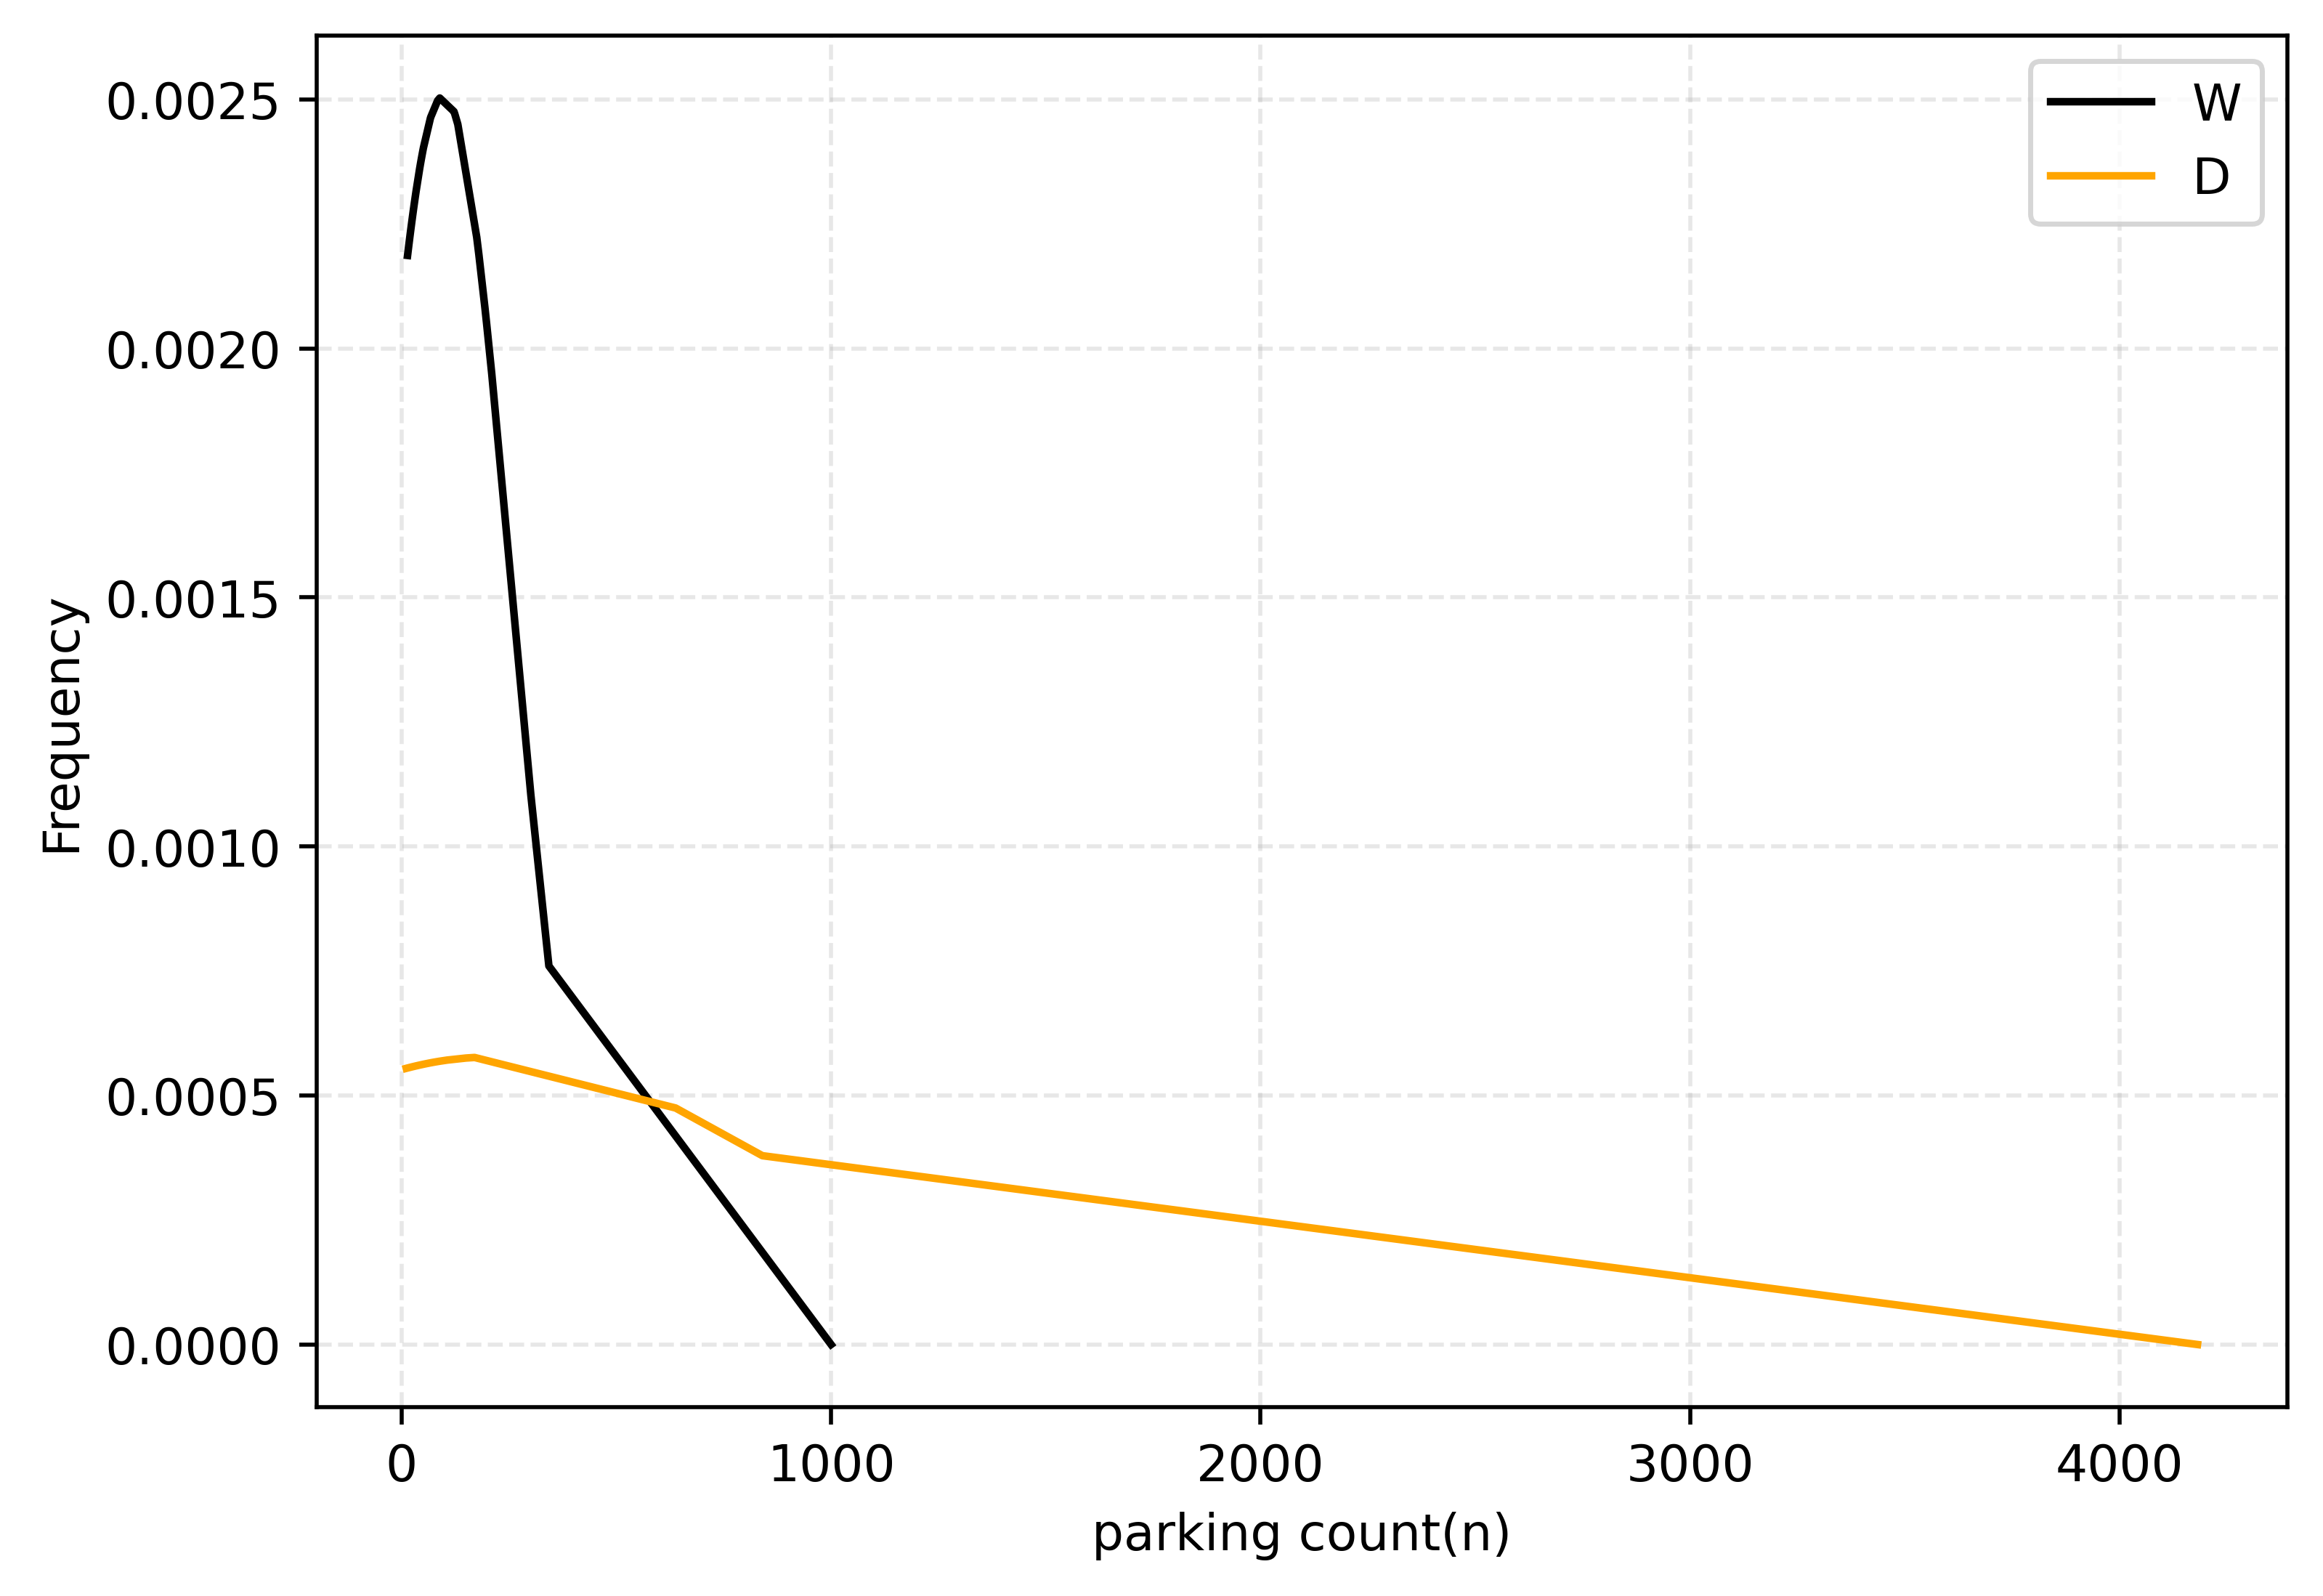

In [439]:
import matplotlib.pyplot as plt
from pylab import rcParams

plt.plot(parkingWc["주차장면수"].sort_values(),  Wparking_pdf, color="Black", label="W")
plt.plot(parkingDc["주차장면수"].sort_values(),  Dparking_pdf, color="Orange", label="D")
#plt.xlim([0,30])
#plt.ylim([0,0.15])
plt.legend()
plt.xlabel("parking count(n)", size=10)
plt.ylabel("Frequency", size=10)
plt.grid(True, alpha=0.3, linestyle="--")
#plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
#plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()

In [140]:
parkinglot = pd.read_csv(file_path + '전주시_공영주차장.csv', encoding='cp949', thousands = ',')
parkinglot


주차장명    주차면수        운영시간  당일최고요금  \
0     오거리 주차장    198면  24시간(연중무휴)  6,000원   
1    건산천1 주차장     78면  24시간(연중무휴)  4,000원   
2    건산천2 주차장     68면  24시간(연중무휴)  4,000원   
3    덕진광장 주차장     33면  24시간(연중무휴)  6,000원   
4    삼천2동 주차장    194면  24시간(연중무휴)  4,000원   
..        ...     ...         ...     ...   
76  인후2동 용수마을     11면        24시간      무료   
77     월드컵경기장  4,181면        24시간      무료   
78      화산체육관    343면        24시간      무료   
79      완산수영장    210면        24시간      무료   
80       덕진공원     70면        24시간      무료   

                                     주차요금                    주 소      전화번호  \
0                  기본(30):600, 추가(15):300     전주시 완산구 팔달로 217-21  239-2768   
1                  기본(30):500, 추가(15):250       전주시 덕진구 숲정이 5길 7  239-2768   
2                  기본(30):500, 추가(15):250     전주시 덕진구 태진로 125-22  239-2768   
3                  기본(30):600, 추가(15):300        전주시 덕진구 덕진광장로 3  239-2768   
4   최초1시간 무료주차/ 이후 기본(30):500, 추가(15):250      전주시 완산구 상거마 4길 24  239-2768   
..                                    ...                    ...       ...   
76                                     무료  전주시 덕진구 거북바우로 124-15        NaN   
77                                     무료      전주시 덕진구 기린대로 1055       NaN   
78                                     무료         전주시 완산구 백제로310       NaN   
79                                     무료      전주시 완산구 쑥고개로366-7       NaN   
80                                     무료       전주시 덕진구 권삼득로 390       NaN   

       비고  
0   유료주차장  
1   유료주차장  
2   유료주차장  
3   유료주차장  
4   유료주차장  
..    ...  
76  무료주차장  
77  무료주차장  
78  무료주차장  
79  무료주차장  
80  무료주차장  

[81 rows x 8 columns]

In [211]:
peoples = people[['구동별(1)', '구동별(2)', '2021']]

peoples = peoples.drop([0,1,2,3,23], axis = 0) # 총계 2932073 / 완산구(152056), 덕진구(141151)
peoples

구동별(1) 구동별(2)   2021
4     완산구    중앙동   3888
5     완산구    풍남동   2424
6     완산구    노송동   6196
7     완산구    완산동   2818
8     완산구   동서학동   3188
9     완산구   서서학동   4483
10    완산구  중화산1동   6395
11    완산구  중화산2동   9129
12    완산구   평화1동   7231
13    완산구   평화2동  18806
14    완산구    서신동  17418
15    완산구   삼천1동   5086
16    완산구   삼천2동   6236
17    완산구   삼천3동   9128
18    완산구   효자1동   4880
19    완산구   효자2동   4622
20    완산구   효자3동   6001
21    완산구   효자4동  16332
22    완산구   효자5동  17795
24    덕진구    진북동   6931
25    덕진구   인후1동   7560
26    덕진구   인후2동   5905
27    덕진구   인후3동  14633
28    덕진구    덕진동  10473
29    덕진구   금암1동   5314
30    덕진구   금암2동   5078
31    덕진구    팔복동   4259
32    덕진구   우아1동   5984
33    덕진구   우아2동   7623
34    덕진구    호성동   7959
35    덕진구   송천1동  23406
36    덕진구   송천2동  10420
37    덕진구    조촌동   6336
38    덕진구    여의동  12469
39    덕진구    혁신동   6801

In [212]:
peopleW = peoples[peoples['구동별(1)'].str.contains('덕진구')]
peopleW

구동별(1) 구동별(2)   2021
24    덕진구    진북동   6931
25    덕진구   인후1동   7560
26    덕진구   인후2동   5905
27    덕진구   인후3동  14633
28    덕진구    덕진동  10473
29    덕진구   금암1동   5314
30    덕진구   금암2동   5078
31    덕진구    팔복동   4259
32    덕진구   우아1동   5984
33    덕진구   우아2동   7623
34    덕진구    호성동   7959
35    덕진구   송천1동  23406
36    덕진구   송천2동  10420
37    덕진구    조촌동   6336
38    덕진구    여의동  12469
39    덕진구    혁신동   6801

In [208]:
#peoples = peoples.rename(columns = {'구동별(1)':'구별', '구동별(2)':'동별'}, inplace = True)

In [213]:
peopleD = peoples[peoples['구동별(1)'].str.contains('완산구')]
peopleD

구동별(1) 구동별(2)   2021
4     완산구    중앙동   3888
5     완산구    풍남동   2424
6     완산구    노송동   6196
7     완산구    완산동   2818
8     완산구   동서학동   3188
9     완산구   서서학동   4483
10    완산구  중화산1동   6395
11    완산구  중화산2동   9129
12    완산구   평화1동   7231
13    완산구   평화2동  18806
14    완산구    서신동  17418
15    완산구   삼천1동   5086
16    완산구   삼천2동   6236
17    완산구   삼천3동   9128
18    완산구   효자1동   4880
19    완산구   효자2동   4622
20    완산구   효자3동   6001
21    완산구   효자4동  16332
22    완산구   효자5동  17795

In [512]:
# 완산구 152056 세대수, 덕진구는 141151 세대수
Dpeo = parkingDc['주차장면수'].sum()
Wpeo = parkingWc['주차장면수'].sum()

Dpeoprecent = (Dpeo/141151)*100
Wpeoprecent = (Wpeo/152056)*100

In [513]:
Wpeoprecent

2.746356605461146

In [514]:
Dpeoprecent

5.263157894736842

In [105]:
people = pd.read_csv(file_path + '전주시_인구.csv', encoding='cp949')
people

구동별(1)  구동별(2)      2021   2021.1    2021.2    2021.3    2021.4   2021.5  \
0   구동별(1)  구동별(2)        합계       합계        합계        합계       한국인      한국인   
1   구동별(1)  구동별(2)  세대수 (세대)  총인구 (명)  남자인구 (명)  여자인구 (명)  세대수 (세대)  총인구 (명)   
2      전주시      소계    293207   666168    327690    338478    293207   657269   
3      완산구      소계    152056   340045    165565    174480    152056   335804   
4      완산구     중앙동      3888     7770      3934      3836      3888     7398   
5      완산구     풍남동      2424     4042      2004      2038      2424     4023   
6      완산구     노송동      6196    11991      5844      6147      6196    11917   
7      완산구     완산동      2818     5444      2670      2774      2818     5414   
8      완산구    동서학동      3188     6311      3128      3183      3188     6269   
9      완산구    서서학동      4483     8693      4250      4443      4483     8619   
10     완산구   중화산1동      6395    14510      7004      7506      6395    14335   
11     완산구   중화산2동      9129    19831      9900      9931      9129    19688   
12     완산구    평화1동      7231    40955     19849     21106      7231    40880   
13     완산구    평화2동     18806    13014      6242      6772     18806    12874   
14     완산구     서신동     17418    46041     22168     23873     17418    45827   
15     완산구    삼천1동      5086    11538      5606      5932      5086    11502   
16     완산구    삼천2동      6236    13504      6485      7019      6236    13436   
17     완산구    삼천3동      9128    22020     10650     11370      9128    21952   
18     완산구    효자1동      4880    10777      5155      5622      4880    10731   
19     완산구    효자2동      4622    10093      4809      5284      4622    10040   
20     완산구    효자3동      6001    14751      6934      7817      6001    14686   
21     완산구    효자4동     16332    41501     20295     21206     16332    39426   
22     완산구    효자5동     17795    37259     18638     18621     17795    36787   
23     덕진구      소계    141151   326123    162125    163998    141151   321465   
24     덕진구     진북동      6931    14149      6894      7255      6931    14084   
25     덕진구    인후1동      7560    18327      8774      9553      7560    18232   
26     덕진구    인후2동      5905    11370      5660      5710      5905    11097   
27     덕진구    인후3동     14633    32188     15748     16440     14633    31930   
28     덕진구     덕진동     10473    21514     10873     10641     10473    20831   
29     덕진구    금암1동      5314     9322      5052      4270      5314     7809   
30     덕진구    금암2동      5078    10149      5019      5130      5078     9782   
31     덕진구     팔복동      4259     7757      4268      3489      4259     7519   
32     덕진구    우아1동      5984    12563      6262      6301      5984    12462   
33     덕진구    우아2동      7623    14634      7613      7021      7623    14481   
34     덕진구     호성동      7959    20016      9589     10427      7959    19907   
35     덕진구    송천1동     23406    64004     31693     32311     23406    63781   
36     덕진구    송천2동     10420    26281     12822     13459     10420    26102   
37     덕진구     조촌동      6336    12732      6527      6205      6336    12573   
38     덕진구     여의동     12469    30837     15489     15348     12469    30638   
39     덕진구     혁신동      6801    20280      9842     10438      6801    20237   

      2021.6    2021.7   2021.8    2021.9   2021.10  
0        한국인       한국인      외국인       외국인       외국인  
1   남자인구 (명)  여자인구 (명)  총인구 (명)  남자인구 (명)  여자인구 (명)  
2     323427    333842     8899      4263      4636  
3     163494    172310     4241      2071      2170  
4       3707      3691      372       227       145  
5       1996      2027       19         8        11  
6       5825      6092       74        19        55  
7       2663      2751       30         7        23  
8       3105      3164       42        23        19  
9       4222      4397       74        28        46  
10      6896      7439      175       108        67  
11      9833      9855      143        67        76  
12     19831     2104

In [261]:
code = pd.read_excel(file_path + '법정코드.xlsx') # 4511000100
code

법정코드 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0    4511000100       전라북도        전주시        NaN      중앙동1가
1    4511000200       전라북도        전주시        NaN      중앙동2가
2    4511000300       전라북도        전주시        NaN      중앙동3가
3    4511000400       전라북도        전주시        NaN      중앙동4가
4    4511000500       전라북도        전주시        NaN      경원동1가
..          ...        ...        ...        ...        ...
219  4511320000       전라북도     전주시덕진구         덕진        우아동
220  4511321000       전라북도     전주시덕진구         덕진        호성동
221  4511322000       전라북도     전주시덕진구         덕진        전미동
222  4511323000       전라북도     전주시덕진구         덕진        송천동
223  4511800000       전라북도     전주시효자출        NaN        NaN

[224 rows x 5 columns]

In [249]:
code['법정코드'].to_list()

[4511000100,
 4511000200,
 4511000300,
 4511000400,
 4511000500,
 4511000600,
 4511000700,
 4511000800,
 4511000900,
 4511001000,
 4511001100,
 4511001200,
 4511001300,
 4511001400,
 4511001500,
 4511001600,
 4511001700,
 4511001800,
 4511001900,
 4511002000,
 4511002100,
 4511002200,
 4511002300,
 4511002400,
 4511002500,
 4511002600,
 4511002700,
 4511002800,
 4511002900,
 4511003000,
 4511003100,
 4511003200,
 4511003300,
 4511003400,
 4511003500,
 4511003600,
 4511003700,
 4511003800,
 4511003900,
 4511004000,
 4511004100,
 4511004200,
 4511004300,
 4511004400,
 4511004500,
 4511004600,
 4511004700,
 4511004800,
 4511004900,
 4511005000,
 4511005100,
 4511005200,
 4511005300,
 4511005400,
 4511010100,
 4511010200,
 4511010300,
 4511010400,
 4511010500,
 4511010600,
 4511010700,
 4511010800,
 4511010900,
 4511011000,
 4511011100,
 4511011200,
 4511011300,
 4511011400,
 4511011500,
 4511011600,
 4511011700,
 4511011800,
 4511011900,
 4511012000,
 4511012100,
 4511012200,
 4511012300,

In [262]:
road = pd.read_csv(file_path + '도로정보.csv', encoding='cp949')
road

도로종류     도로특성   시설물종류  차선수    통행제한 유료여부  포장여부  제한속도  도로명 시설물명  \
0        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
2        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
3        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
4        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
...        ...      ...     ...  ...     ...  ...   ...   ...  ...  ...   
1029437  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1029438  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1029439  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1029440     국도  본선(비분리)  시설물 없음    2  양방향통행가   무료  포장도로    60  NaN        
1029441     국도  본선(비분리)  시설물 없음    2  양방향통행가   무료  포장도로    60  NaN        

             링크id        법정동코드   
0        10100001  5.013025e+09  
1        10100034  5.013025e+09  
2        10100002  5.013025e+09  
3        10100035  5.013025e+09  
4        10100011  5.013025e+09  
...           ...           ...  
1029437  54400547  4.282025e+09  
1029438  54400548  4.282031e+09  
1029439  54400551  4.282031e+09  
1029440  54400556  4.282031e+09  
1029441  54400557  4.282031e+09  

[1029442 rows x 12 columns]

In [257]:
road.dtypes

도로종류        object
도로특성        object
시설물종류       object
차선수          int64
통행제한        object
유료여부        object
포장여부        object
제한속도         int64
도로명         object
시설물명        object
링크id         int64
 법정동코드     float64
dtype: object

In [ ]:
road[''] #4511000100 peopleD = peoples[peoples['구동별(1)'].str.contains('완산구')]

In [258]:
road.columns

Index(['도로종류', '도로특성', '시설물종류', '차선수', '통행제한', '유료여부', '포장여부', '제한속도', '도로명',
       '시설물명', '링크id', ' 법정동코드 '],
      dtype='object')

In [269]:
road = road[road[' 법정동코드 '] >= 4511000100]

도로종류     도로특성   시설물종류  차선수    통행제한 유료여부  포장여부  제한속도  도로명 시설물명  \
0        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
2        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
3        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
4        기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
...        ...      ...     ...  ...     ...  ...   ...   ...  ...  ...   
1014691  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1014692  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1014693  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1014694  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        
1014695  기타도로1  본선(비분리)  시설물 없음    1  양방향통행가   무료  포장도로     0  NaN        

             링크id        법정동코드   
0        10100001  5.013025e+09  
1        10100034  5.013025e+09  
2        10100002  5.013025e+09  
3        10100035  5.013025e+09  
4        10100011  5.013025e+09  
...           ...           ...  
1014691       151  4.794025e+09  
1014692       152  4.794025e+09  
1014693       153  4.794025e+09  
1014694       154  4.794025e+09  
1014695       155  4.794025e+09  

[363024 rows x 12 columns]

In [115]:
# 라이브러리 import
import requests
import pprint
import json

# url 입력

#url = 'http://apis.data.go.kr/6450000/trafficlights/gettrafficlights?serviceKey=c49JJdsOJHaL210xLul9qZmlFq6gf7r52Jd2HjljALvzs%2FvJY5eNNADtobC7j7eIq0yOibWFH%2BahbfTA6i5WCA%3D%3D&pageNo=1&numOfRows=1000&type=json'
# url 불러오기

#url = 'http://openapi.jeonju.go.kr/rest/parking?serviceKey=c49JJdsOJHaL210xLul9qZmlFq6gf7r52Jd2HjljALvzs%2FvJY5eNNADtobC7j7eIq0yOibWFH%2BahbfTA6i5WCA%3D%3D&pageNo=1&numOfRows=1000&type=json'

url = 'http://openapi.jeonju.go.kr/rest/parking/getParkingList?serviceKey=c49JJdsOJHaL210xLul9qZmlFq6gf7r52Jd2HjljALvzs%2FvJY5eNNADtobC7j7eIq0yOibWFH%2BahbfTA6i5WCA%3D%3D&pageNo=1&numOfRows=1000&type=json'

#데이터 값 출력해보기
contents = response.text

In [116]:
# 데이터 결과값 예쁘게 출력해주는 코드
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))



('<?xml version="1.0" encoding="UTF-8" '
 'standalone="yes"?><rfcOpenApi><header><resultCode>30</resultCode><resultMsg>SERVICE '
 'KEY IS NOT REGISTERED ERROR.</resultMsg></header></rfcOpenApi>')
None


In [117]:
#문자열을 json으로 변경
json_ob = json.loads(contents)
print(json_ob)
print(type(json_ob)) #json타입 확인

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [56]:
body = json_ob['items'] # item 안에만 들어있어서 그것만 가져옴
#['sigunCode']['signguNm']['lnmadr']['roadRouteNm']['latitude']['sondSgngnrYn']['longitude']['tfclghtSe']['signlTimeMthdType']['roadType']
print(body)

[{'ctprvnno': '101', 'ctprvnNm': '전라북도', 'signguNm': '순창군', 'roadKnd': '군도', 'roadRouteNm': '순창로', 'roadRouteDrc': '03', 'lnmadr': '전라북도 순창군 순창읍 남계리 204-3', 'latitude': '35.37767523', 'longitude': '127.1436982', 'sgngnrInstlMthd': '03', 'roadType': '02', 'priorRoadYn': 'Y', 'tfclghtManageNo': '14', 'tfclghtSe': '01', 'tfclghtColorKnd': '04', 'sgnaspMthd': '04', 'sgnaspOrdr': '녹색+황색+녹색화살표+적색', 'sotKnd': '02', 'signlCtrlMthd': '01', 'signlTimeMthdType': '01', 'opratnYn': 'Y', 'flashingLightOpenHhmm': '22:00', 'flashingLightCloseHhmm': '06:00', 'fnctngSgngnrYn': 'N', 'remndrIdctYn': 'N', 'sondSgngnrYn': 'N', 'sigunCode': '12', 'institutionNm': '순창군', 'phoneNumber': '063-650-1114', 'referenceDate': '2021-12-21'}, {'ctprvnno': '102', 'ctprvnNm': '전라북도', 'signguNm': '순창군', 'roadKnd': '군도', 'roadRouteNm': '순창로', 'roadRouteDrc': '03', 'lnmadr': '전라북도 순창군 순창읍 남계리 204-3', 'latitude': '35.37767059', 'longitude': '127.1437485', 'sgngnrInstlMthd': '03', 'roadType': '02', 'priorRoadYn': 'Y', 'tfclgh

In [57]:
import pandas as pd
from pandas.io.json import json_normalize
# Dataframe으로 만들기
dataframe = json_normalize(body)

print(dataframe)

  ctprvnno ctprvnNm signguNm roadKnd roadRouteNm roadRouteDrc  \
0      101     전라북도      순창군      군도         순창로           03   
1      102     전라북도      순창군      군도         순창로           03   
2      103     전라북도      순창군      군도         순창로           03   
3      104     전라북도      순창군      군도         순창로           03   
4      105     전라북도      순창군    일반국도         담순로           03   
5      106     전라북도      순창군    일반국도         담순로           03   
6      107     전라북도      순창군    일반국도         담순로           02   
7      108     전라북도      순창군    일반국도         담순로           02   
8      109     전라북도      순창군    일반국도         담순로           01   
9      110     전라북도      순창군    일반국도         담순로           01   

                    lnmadr     latitude    longitude sgngnrInstlMthd  ...  \
0   전라북도 순창군 순창읍 남계리 204-3  35.37767523  127.1436982              03  ...   
1   전라북도 순창군 순창읍 남계리 204-3  35.37767059  127.1437485              03  ...   
2   전라북도 순창군 순창읍 남계리 204-3  35.37778267  127.1438354 

/var/folders/ts/qlqc0dr52sn_xpkshw60mrmr0000gn/T/ipykernel_51675/3177094058.py:4: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [58]:
signal = dataframe[['sigunCode', 'signguNm', 'lnmadr', 'roadRouteNm', 'latitude', 'sondSgngnrYn', 'longitude', 'tfclghtSe', 'signlTimeMthdType', 'roadType']]

In [59]:
signal #01:전주시, 02:군산시, 03:익산시, 04:정읍시, 05:남원시, 06:김제시, 07:완주군 
# 08:진안군, 09:무주군, 10:장수군, 11:임실군, 12:순창군, 13:고창군, 14:부안군

sigunCode signguNm                   lnmadr roadRouteNm     latitude  \
0        12      순창군   전라북도 순창군 순창읍 남계리 204-3         순창로  35.37767523   
1        12      순창군   전라북도 순창군 순창읍 남계리 204-3         순창로  35.37767059   
2        12      순창군   전라북도 순창군 순창읍 남계리 204-3         순창로  35.37778267   
3        12      순창군   전라북도 순창군 순창읍 남계리 204-3         순창로  35.37774833   
4        12      순창군  전라북도 순창군 순창읍 남계리 186-10         담순로  35.37942943   
5        12      순창군  전라북도 순창군 순창읍 남계리 186-10         담순로  35.37941565   
6        12      순창군  전라북도 순창군 순창읍 남계리 170-19         담순로  35.37933664   
7        12      순창군  전라북도 순창군 순창읍 남계리 170-19         담순로  35.37936065   
8        12      순창군  전라북도 순창군 순창읍 남계리 170-19         담순로  35.37923001   
9        12      순창군  전라북도 순창군 순창읍 남계리 170-19         담순로   35.3791957   

  sondSgngnrYn    longitude tfclghtSe signlTimeMthdType roadType  
0            N  127.1436982        01                01       02  
1            N  127.1437485        01                01       02  
2            N  127.1438354        01                01       02  
3            N  127.1438325        01                01       02  
4            N  127.1439049        01                01       02  
5            N  127.1439426        01                01       02  
6            N  127.1439677        01                01       02  
7            N  127.1439887        01                01       02  
8            N  127.1441058        01                01       02  
9            N  127.1440848        01                01       02

In [61]:
signal.shape

(10, 10)

In [38]:
# signunCode 1번 전주만 찾기

jj_code = (signal.signguNm == '전주시') # 조건식 작성

signal[jj_code]

Empty DataFrame
Columns: [sigunCode, signguNm, lnmadr, roadRouteNm, latitude, sondSgngnrYn, longitude, tfclghtSe, signlTimeMthdType, roadType]
Index: []